In [1]:
#import math
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
#from IPython.display import display, Image
#from sklearn import manifold
#from sklearn.metrics.pairwise import pairwise_distances
from scipy import stats
import os

In [67]:
#read in metadata
metadata = pd.read_csv("./latest_metadata_database.csv")
metadata['disease'] = metadata['disease'].replace(["Carrier"], "carrier")
relevant_clusters = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,25,27,29,36]

/Users/nm12/anaconda/envs/jupyter/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (12,16,17,19,20,21,22,23,24,26,27,29,33,34,35,36,37,39,46,48,51,52,53,54,55,56,57,59,67,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pangenome_gwas = pd.read_csv("./panaroo_data/pan-gwas/recombination_pan-gwas.tsv", sep="\t")
pav_sv_gwas = pd.read_csv("./panaroo_data/pan-gwas/recombination_sv_gwas.tsv", sep="\t")

In [38]:
pangenome_gwas_sig = pangenome_gwas[pangenome_gwas["lrt-pvalue"] < 5e-5]
pan_sv_gwas_sig = pav_sv_gwas[pav_sv_gwas["lrt-pvalue"]<5e-5]

<AxesSubplot:>

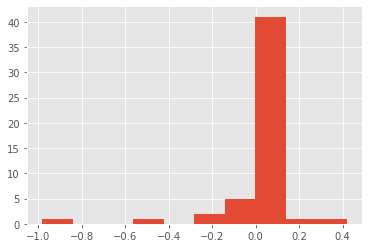

In [39]:
pangenome_gwas_sig["beta"].hist()

<AxesSubplot:>

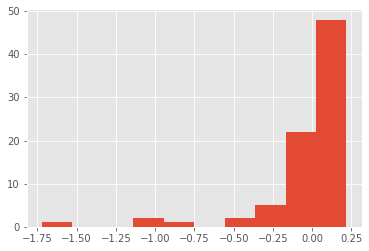

In [40]:
pan_sv_gwas_sig["beta"].hist()

In [36]:
pangenome_gwas_sig[pangenome_gwas_sig["beta"].abs()>0.3]

variant      af  filter-pvalue    lrt-pvalue   beta  \
909                 mafB17  0.1330       0.081900  1.810000e-13 -0.981   
1178  pilX~~~fimA~~~fimA_2  0.0579       0.000061  9.910000e-09 -0.463   
1741            group_2782  0.0154       0.653000  1.710000e-07  0.418   

      beta-std-err  intercept     year  country_0  country_1  ...  \
909         0.1330       3.74 -0.00181     0.0807    -0.0428  ...   
1178        0.0806       3.93 -0.00191     0.0816    -0.0392  ...   
1741        0.0798       3.74 -0.00181     0.0801    -0.0436  ...   

      PopPUNK_cluster_15  PopPUNK_cluster_16  PopPUNK_cluster_17  \
909               0.0114             0.00843              0.0586   
1178              0.0118             0.00821              0.0585   
1741             -0.4030             0.00902              0.0591   

      PopPUNK_cluster_18  PopPUNK_cluster_19  PopPUNK_cluster_20  \
909               0.0317              0.0407              0.0373   
1178              0.0320              0.0407              0.0369   
1741              0.0324              0.0411              0.0375   

      PopPUNK_cluster_21  PopPUNK_cluster_22  PopPUNK_cluster_23  notes  
909               0.0533             -0.0327              0.0858    NaN  
1178              0.0530             -0.0327              0.0855    NaN  
1741              0.0498             -0.0324              0.0861    NaN  

[3 rows x 90 columns]

In [47]:
pilX_fimA_fimA_2 = """
GTGGGAATCCAGTTTTTTGAGTTTCAGTCATTTCCGATAAATTGCCTTAGCATTGAATGT
CTAGATTCCCGCCTGCGCGGGAATGACGAACCTATCCGTACGGAAACCTGCATCCCGTCA
TTCCCACGAACCTGCATCCAGTCATTCCCACGAAAGTGGGAATCCAGTTTTTTGAGTTTC
AGTCATTTNAAACAGTTTATTTTGAAAAATCCCCTGGACGATAATCAGACCATCAAGAGC
AAACTGGAAATATTTGTCTCAGGCTATAAGATGAATCCGAAAATTGCCAAAAAATATAGT
GTTTCGGTAAAGTTTGTCGATAAGGAAAAATCAAGGGCATACAGGTTGGTCGGCGTTCCG
AAGGCGGGGACGGGTTATACTTTGTCGGCATGGATGAACAGCGTGGGCGACGGATACAAA
TGCCGTGATGCCGCTTCTGCCCGAGCCTATTCGGAGACTTTGTCCGCGGATGCCGGCTGT
GAAGCTTTCTCTAATCGTAAAAAATAG"""

In [48]:
pilX_fimA_fimA_2_pilE_1_pilX_1_fimA_1_pilE_3_pilE_2_pilE_9_pilE_10_pilX_2 = """
ATGGAACAAAAAGGGTTTACATTGATTGAGATGATGATAGTCGTCGCGATACTCGGCATT
ATCAGCGTCATTGCCATACCTTCTTATCAAAGTTATATTGAAAAAGGCTATCAGTCCCAG
CTTTATACGGAGATGGTCGGTATCAACAATATTTCCAAACAGTTTATTTTGAAAAATCCC
CTGGACGATAATCAGACCATCAAGAGCAAACTGGAAATATTTGTCTCAGGCTATAAGATG
AATCCGAAAATTGCCGAAAAATATAATGTTTCGGTGCATTTTGTCAATAAGGAAAAACCA
AGGGCATACAGCTTGGTCGGCGTTCCAAAGACGGGGACGGGTTATACTTTGTCGGTATGG
ATGAACAGCGTGGGCGACGGATACAAATGCCGTGATAAGGCTTCTGCCGAAGCCTATTCG
GAGACCTTGTCCGCAGATGCCGGCTGTGAAGCCTTCTCTAATCNNNNNNNNNNNNNNNNN
NNNNCGGCTTATGTGTTTGATATGTACGGCTTCTACAAACCGGCTAAAAACCTGACTTTG
CGTGCAGGCGTATATAATGTGTTCAACCGCAAATACACCACTTGGGATTCCCTGCGCGGC
CTGTATAGCTACAGCACCACCAACTCGGTCGACCGCGATGGCAAAGGCTTAGACCGCTAC
CGCGCCCCAAGCCGTAATTACGCCGTATCGCTGGAATGGAAGTTTTAA"""

In [ ]:
group_2782
ATGGTTGATGAAAAACTGGCCGAATACCGCAAACGGGCGGCAGCCAAGCGGACGATAAAAAATGTCTCGTTTAACAACGAAGCCGAGAAAGATTTACTTGAGTTTGCGAATAAAGTTGATTTTTCCCAATGGGTTAAGGAGAAAATCCGCAAAGAGATGCAAAAATAG;ATGGTTGATGAAAAGTTGGCTGAGTATCGAAAACGCGCTGAAGCAAAGCGCACGACAAAAAAAGTCTCATTTAACCTGGAAACAGAAAAAGATATTTTGGATGTTGCAAATAATATTGATTTTTCTCAATGGGTTAAAGAGAAACTTCGAGAAAAGCTGAAAAAAGAACTTGATTGA


In [49]:
print(len(pilX_fimA_fimA_2))
print(len(pilX_fimA_fimA_2_pilE_1_pilX_1_fimA_1_pilE_3_pilE_2_pilE_9_pilE_10_pilX_2))

516
720


In [46]:
for thing in pan_sv_gwas_sig[pan_sv_gwas_sig["beta"].abs()>0.3]["variant"]:
    print(thing)

fabF2~~~fabF2_2~~~fabF2_1~~~dxs~~~dxs_2~~~fabF2~~~rpmA-fabF2-fabF2_2~~~fabF2~~~fabF2_1~~~fabF2
group_1007-mafB17-group_1836
group_2386-group_2385-ubiH~~~ubiH_1~~~~~~ubiF
pilJ~~~pilW~~~~~~pilJ_1~~~pilJ_2-pilK~~~~~~pilK_1~~~pilK_2-pilX~~~fimA~~~fimA_2
group_1837-group_1879-group_2405
cycA-group_1880-group_1904
group_267-fabF2~~~fabF2_2~~~fabF2_1~~~dxs~~~dxs_2~~~fabF2~~~rpmA-fabF2
groES-frpD_5-group_2330
group_1533-frpD_5-group_2330


In [23]:
unitg_gwas  = pd.read_csv("./recombination_data/gwas/recombination_unitigs_gwas.tsv", sep="\t")

In [24]:
unitig_gwas_sig = unitg_gwas[unitg_gwas["lrt-pvalue"] < 5e-8]

In [25]:
unitig_gwas_sig.shape

(6375, 90)

Text(0.5, 0, '$\\beta$ (Effect size)')

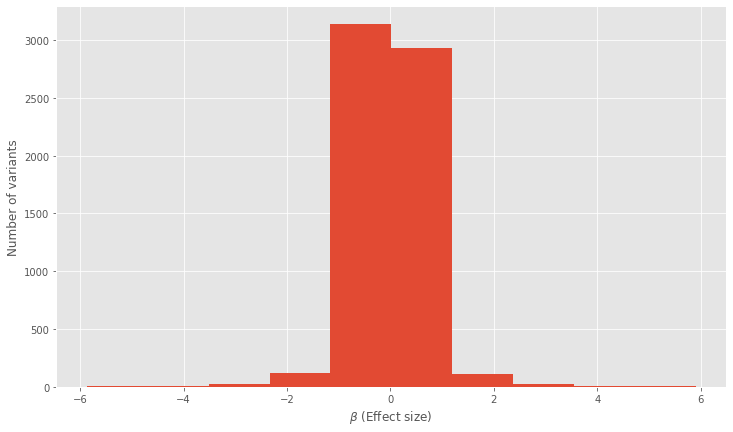

In [106]:
fig, ax = plt.subplots(figsize=(12, 7))
unitig_gwas_sig["beta"].hist()
plt.ylabel("Number of variants")
plt.xlabel(r"$\beta$ (Effect size)")

In [107]:
unitig_gwas_sig[unitig_gwas_sig["beta"]>4]

variant      af  \
366864            GGCAATCAATCCTGCCGCTTCGCGCCGCATCACCTCTTG  0.0755   
367501                 ATGCGGCGCGAAGCGGCAGGATTGATTGCCGCCG  0.0755   
367845                  CTTCGGCGGCAATCAATCCTGCCGCTTCGCGCC  0.0755   
467947         TTTACACCTACGCGCAAGAGGTGATGCGGCGCGAAGCGGCAG  0.0755   
468607                   TCCTGCCGCTTCGCGCCGCATCACCTCTTGCG  0.0755   
782474   GGAATAGGCATATCCGACAACAATGCCGTCCGAAGATTCAGACGGCAT  0.1340   
943950                AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG  0.0755   
1225692              GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC  0.0755   

         filter-pvalue    lrt-pvalue  beta  beta-std-err  intercept     year  \
366864    9.810000e-24  4.840000e-88  5.87         0.292       3.83 -0.00182   
367501    9.810000e-24  4.840000e-88  5.87         0.292       3.83 -0.00182   
367845    9.810000e-24  4.840000e-88  5.87         0.292       3.83 -0.00182   
467947    9.810000e-24  4.840000e-88  5.87         0.292       3.83 -0.00182   
468607    9.810000e-24  4.840000e-88  5.87         0.292       3.83 -0.00182   
782474    2.170000e-02  1.340000e-85  5.87         0.296       3.76 -0.00179   
943950    9.810000e-24  9.570000e-89  5.90         0.292       3.81 -0.00181   
1225692   9.810000e-24  9.570000e-89  5.90         0.292       3.81 -0.00181   

         country_0  country_1  ...  PopPUNK_cluster_15  PopPUNK_cluster_16  \
366864     -0.0385     -0.109  ...              0.0113             0.00828   
367501     -0.0385     -0.109  ...              0.0113             0.00828   
367845     -0.0385     -0.109  ...              0.0113             0.00828   
467947     -0.0385     -0.109  ...              0.0113             0.00828   
468607     -0.0385     -0.109  ...              0.0113             0.00828   
782474     -0.0376     -0.109  ...              0.0165             0.00814   
943950     -0.0384     -0.109  ...              0.0116             0.00827   
1225692    -0.0384     -0.109  ...              0.0116             0.00827   

         PopPUNK_cluster_17  PopPUNK_cluster_18  PopPUNK_cluster_19  \
366864               0.0586              0.0316              0.0407   
367501               0.0586              0.0316              0.0407   
367845               0.0586              0.0316              0.0407   
467947               0.0586              0.0316              0.0407   
468607               0.0586              0.0316              0.0407   
782474               0.0586              0.0314              0.0408   
943950               0.0589              0.0316              0.0245   
1225692              0.0589              0.0316              0.0245   

         PopPUNK_cluster_20  PopPUNK_cluster_21  PopPUNK_cluster_22  \
366864               0.0372              0.0532             -0.0326   
367501               0.0372              0.0532             -0.0326   
367845               0.0372              0.0532             -0.0326   
467947               0.0372              0.0532             -0.0326   
468607               0.0372              0.0532             -0.0326   
782474               0.0372              0.0532             -0.0325   
943950               0.0374              0.0535             -0.0323   
1225692              0.0374              0.0535             -0.0323   

         PopPUNK_cluster_23  notes  
366864               0.0857    NaN  
367501               0.0857    NaN  
367845               0.0857    NaN  
467947               0.0857    NaN  
468607               0.0857    NaN  
782474               0.0859    NaN  
943950               0.0861    NaN  
1225692              0.0861    NaN  

[8 rows x 90 columns]

In [32]:
for thing in unitig_gwas_sig[unitig_gwas_sig["beta"].abs()>3]["variant"]:
    print(thing)

GCAGTCCGGGTTAACCCACAGACGTTCAACTGGTACAACCTCGATGGCTTTGCGCAACAGG
TGGAGCTTTGGCAAAAGTCGGCAGCCTGACAATGGTGTCGCGCGTTTTGGGATTTGTGCGC
GCCGACGAACTCCTGTTCGGCAAACTATCCAACGGCGGCTTCGTGCGGATAGACTGGG
CAGAAAAAGGCCAATATGCGGTAGCATACGACCTTTCCTGCAAG
AGTGCAACTTTCCCTAACAGAAAAAGGCCAATATGCGGTAGCATACG
ATAGTTTAAGAAACGCGGGATTTCCGGACGATATTTGTCTTTGCCGTCGCGGTAGTACAGG
TAGACTGGAAAAGCTTCACAAAATAACGGACCGCCCCACTATG
CTTCACAAAATAACGGACCGCCCCACTATGCACAA
GGCAATCAATCCTGCCGCTTCGCGCCGCATCACCTCTTG
ATGCGGCGCGAAGCGGCAGGATTGATTGCCGCCG
CTTCGGCGGCAATCAATCCTGCCGCTTCGCGCC
TTGGTTGCGCCGCCAAAAAGCAGGCGAACAAAAAGAACAGTCAAAAATCGATTGGGACGAT
TCCAAATAACCGCGCCGCACTTCGCCGGTCTGGCTGTCGGTATAGCCGT
CACATCCAAATAACCGCGCCGCACTTCGCCGGTC
TTTACACCTACGCGCAAGAGGTGATGCGGCGCGAAGCGGCAG
TCCTGCCGCTTCGCGCCGCATCACCTCTTGCG
CGGCATAGACTGGAAAAGCTTCACAAAATAACGGA
AACGGCGGCTTCGTGCGGATAGACTGGGATG
ATCCCAGTCTATCCGCACGAAGCCGCCGTTGG
GGAATAGGCATATCCGACAACAATGCCGTCCGAAGATTCAGACGGCAT
AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG
TTCGAACCAGCGGTAAAACTTGTCAAACGCTTCGGGGACGGGCAAGCCGGC
GCGTTTGACAAG

In [84]:
#DNA uptake sequence 5′-(AT)GCCGTCTGAA-3'
unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("GCCGTCTGAA")]#.index) & set(unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("TTCAGACGGC")].index)

variant      af  \
158           TTGACGATTGAAAAATGCCGTCTGAAACCCAGAAAAAGGCTTTC  0.1340   
790        ATGCCGTCTGAAACCCAGAAAAAGGCTTTCAGACGGCATTTGTCCGG  0.1340   
2201     AATGCCGTCTGAAGCCCTGCCTGCCATTCCTCTATGCTTTGGCCGG...  0.1340   
2420                   TCAAGCACAAATAAATGCCGTCTGAAATGCAGATA  0.1340   
2538                   AGAAGCCTTCGGAAGCATAAAGAATGCCGTCTGAA  0.9120   
...                                                    ...     ...   
1265640                    GATGCCGTCTGAAACGGTTGTCAGGCGGTAC  0.0709   
1284776                   TTGACCTGCCGATGCCGTCTGAAAGGGTTTCC  0.1340   
1350248                 AAGGAAAATGCCGTCTGAAACAGGATTCAGACGG  0.1340   
1350954                  GCCGTCTGAAACAGGATTCAGACGGCATTTCCA  0.1340   
1381622               ATCAGAATGCCGTCTGAAACCCTGCCGATTATCGGA  0.1340   

         filter-pvalue    lrt-pvalue    beta  beta-std-err  intercept  \
158       4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
790       4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
2201      4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
2420      4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
2538      2.410000e-15  3.700000e-10 -0.1530       0.02440       3.62   
...                ...           ...     ...           ...        ...   
1265640   9.080000e-16  5.350000e-09 -0.1790       0.03060       3.81   
1284776   4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
1350248   3.100000e-02  4.260000e-12  2.1700       0.31300       3.81   
1350954   4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
1381622   4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   

            year  country_0  country_1  ...  PopPUNK_cluster_15  \
158     -0.00180    -0.0380     -0.109  ...             0.01130   
790     -0.00180    -0.0380     -0.109  ...             0.01130   
2201    -0.00180    -0.0380     -0.109  ...             0.01130   
2420    -0.00180    -0.0380     -0.109  ...             0.01130   
2538    -0.00165    -0.0340     -0.106  ...             0.00966   
...          ...        ...        ...  ...                 ...   
1265640 -0.00182    -0.0402     -0.110  ...             0.01050   
1284776 -0.00180    -0.0380     -0.109  ...             0.01130   
1350248 -0.00181    -0.0382     -0.109  ...             0.01150   
1350954 -0.00180    -0.0380     -0.109  ...             0.01130   
1381622 -0.00180    -0.0380     -0.109  ...             0.01130   

         PopPUNK_cluster_16  PopPUNK_cluster_17  PopPUNK_cluster_18  \
158                 0.00831              0.0585              0.0316   
790                 0.00831              0.0585              0.0316   
2201                0.00831              0.0585              0.0316   
2420                0.00831              0.0585              0.0316   
2538                0.00772              0.0589              0.0329   
...                     ...                 ...                 ...   
1265640             0.00995              0.0575              0.0312   
1284776             0.00831              0.0585              0.0316   
1350248             0.00825              0.0587              0.0315   
1350954             0.00831              0.0585              0.0316   
1381622             0.00831              0.0585              0.0316   

         PopPUNK_cluster_19  PopPUNK_cluster_20  PopPUNK_cluster_21  \
158                  0.0406              0.0371              0.0531   
790                  0.0406              0.0371              0.0531   
2201                 0.0406              0.0371              0.0531   
2420                 0.0406              0.0371              0.0531   
2538                 0.0411              0.0361              0.0540   
...                     ...                 ...                 ...   
1265640              0.0392              0.0363              0.0520   
1284776              0.0406              0.0371              0.0531   
1350248              0.0409         

In [129]:
#reverse compliment TTCAGACGGC
#overlap = 16
# 108+ (108-16) = 200
unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("TTCAGACGGC")]

variant      af  \
790        ATGCCGTCTGAAACCCAGAAAAAGGCTTTCAGACGGCATTTGTCCGG  0.1340   
1946                  CTGAATCCTGTTTCAGACGGCATTTTCCTTGCAACC  0.1340   
2324     CGTCTGAAGCCGGAATGTTTCAGACGGCATTGCATCAAACTCCATA...  0.1340   
2341             CAATGGCGTTCAGACGGCATTGGATCGAGAACTACGTTACC  0.0339   
2882              CCGTCTGAAGGTGTTTCAGACGGCATTTCTATAATAAACC  0.0556   
...                                                    ...     ...   
1284710                    CGGAAACCCTTTCAGACGGCATCGGCAGGTC  0.1340   
1284787                    TGAAGCGGAAACCCTTTCAGACGGCATCGGC  0.1340   
1350954                  GCCGTCTGAAACAGGATTCAGACGGCATTTCCA  0.1340   
1364355                 ATTTCAAGCTGGAAAATATAGTTTCAGACGGCAA  0.3110   
1381600                 AATCGGCAGGGTTTCAGACGGCATTCTGATAATT  0.1340   

         filter-pvalue    lrt-pvalue    beta  beta-std-err  intercept  \
790       4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
1946      3.100000e-02  4.260000e-12  2.1700       0.31300       3.81   
2324      4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
2341      2.600000e-01  2.470000e-08 -0.4640       0.08320       3.78   
2882      1.940000e-09  3.750000e-08  0.1100       0.02010       3.89   
...                ...           ...     ...           ...        ...   
1284710   4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
1284787   4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
1350954   4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   
1364355   7.850000e-03  2.900000e-09 -0.1250       0.02110       3.24   
1381600   4.360000e-02  8.120000e-12  0.0477       0.00696       3.77   

            year  country_0  country_1  ...  PopPUNK_cluster_15  \
790     -0.00180    -0.0380     -0.109  ...              0.0113   
1946    -0.00181    -0.0382     -0.109  ...              0.0115   
2324    -0.00180    -0.0380     -0.109  ...              0.0113   
2341    -0.00180    -0.0385     -0.109  ...              0.0114   
2882    -0.00185    -0.0405     -0.112  ...             -0.0958   
...          ...        ...        ...  ...                 ...   
1284710 -0.00180    -0.0380     -0.109  ...              0.0113   
1284787 -0.00180    -0.0380     -0.109  ...              0.0113   
1350954 -0.00180    -0.0380     -0.109  ...              0.0113   
1364355 -0.00153    -0.0309     -0.110  ...              0.0129   
1381600 -0.00180    -0.0380     -0.109  ...              0.0113   

         PopPUNK_cluster_16  PopPUNK_cluster_17  PopPUNK_cluster_18  \
790                 0.00831              0.0585              0.0316   
1946                0.00825              0.0587              0.0315   
2324                0.00831              0.0585              0.0316   
2341                0.00759              0.0585              0.0307   
2882               -0.09180              0.0360              0.0249   
...                     ...                 ...                 ...   
1284710             0.00831              0.0585              0.0316   
1284787             0.00831              0.0585              0.0316   
1350954             0.00831              0.0585              0.0316   
1364355             0.12700              0.0592              0.0311   
1381600             0.00831              0.0585              0.0316   

         PopPUNK_cluster_19  PopPUNK_cluster_20  PopPUNK_cluster_21  \
790                  0.0406              0.0371              0.0531   
1946                 0.0409              0.0373              0.0533   
2324                 0.0406              0.0371              0.0531   
2341                 0.4930              0.0371              0.0531   
2882                 0.0430              0.0380              0.0543   
...                     ...                 ...                 ...   
1284710              0.0406              0.0371              0.0531   
1284787              0.0406              0.0371              0.0531   
1350954              0.0406         

In [134]:
np.mean(unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("GCCGTCTGAA|TTCAGACGGC")]["beta"])

0.0354145

In [135]:
stats.mannwhitneyu(unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("GCCGTCTGAA|TTCAGACGGC")]["beta"], unitig_gwas_sig[~unitig_gwas_sig["variant"].str.contains("GCCGTCTGAA|TTCAGACGGC")]["beta"])

MannwhitneyuResult(statistic=551898.0, pvalue=0.005155752126012511)

In [86]:
#Correria repeat GT[CA]C[CT]G[GA]TTTTTGTTAAT[CT]C[GA]CTATA
unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("GT[CA]C[CT]G[GA]TTTTTGTTAAT[CT]C[GA]CTATA", regex=True)]

variant     af  filter-pvalue    lrt-pvalue  \
1013136  ACGCTGTACCGGTTTTTGTTAATCCACTATA  0.359          0.281  3.970000e-09   

          beta  beta-std-err  intercept     year  country_0  country_1  ...  \
1013136  0.139        0.0236       3.87 -0.00185    -0.0375     -0.107  ...   

         PopPUNK_cluster_15  PopPUNK_cluster_16  PopPUNK_cluster_17  \
1013136              -0.124            -0.00228              0.0322   

         PopPUNK_cluster_18  PopPUNK_cluster_19  PopPUNK_cluster_20  \
1013136               0.034             -0.0896              0.0236   

         PopPUNK_cluster_21  PopPUNK_cluster_22  PopPUNK_cluster_23  notes  
1013136             -0.0794              -0.169             -0.0462    NaN  

[1 rows x 90 columns]

In [102]:
#reverse compliment 
unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("TATAG[TC]G[AG]ATTAACAAAAA[TC]T[AG]G[TG]AC", regex=True)]

Empty DataFrame
Columns: [variant, af, filter-pvalue, lrt-pvalue, beta, beta-std-err, intercept, year, country_0, country_1, country_2, country_3, country_4, country_5, country_6, country_7, country_8, country_9, country_10, country_11, country_12, country_13, country_14, country_15, country_16, country_17, country_18, country_19, country_20, country_21, country_22, country_23, country_24, country_25, country_26, country_27, country_28, country_29, country_30, country_31, country_32, country_33, country_34, country_35, country_36, country_37, country_38, country_39, country_40, country_41, country_42, country_43, country_44, country_45, country_46, country_47, country_48, country_49, country_50, country_51, country_52, country_53, country_54, country_55, country_56, PopPUNK_cluster_0, PopPUNK_cluster_1, PopPUNK_cluster_2, PopPUNK_cluster_3, PopPUNK_cluster_4, PopPUNK_cluster_5, PopPUNK_cluster_6, PopPUNK_cluster_7, PopPUNK_cluster_8, PopPUNK_cluster_9, PopPUNK_cluster_10, PopPUNK_cluster_11, PopPUNK_cluster_12, PopPUNK_cluster_13, PopPUNK_cluster_14, PopPUNK_cluster_15, PopPUNK_cluster_16, PopPUNK_cluster_17, PopPUNK_cluster_18, PopPUNK_cluster_19, PopPUNK_cluster_20, PopPUNK_cluster_21, PopPUNK_cluster_22, PopPUNK_cluster_23, notes]
Index: []

[0 rows x 90 columns]

In [99]:
#NIME flanking dSR3 ATTCCC........GGGAAT
unitig_gwas_sig[unitig_gwas_sig["variant"].str.contains("ATTCCC........GGGAAT", regex=True)]

variant     af  filter-pvalue  \
1301214           TCAATGAACCGGATTCCCGCTTGCGCGGGAATGAC  0.134         0.0436   
1345018  CGTGTGAAAATTTAAAAGGTCTAGATTCCCACTTTCGTGGGAAT  0.134         0.0436   

           lrt-pvalue    beta  beta-std-err  intercept    year  country_0  \
1301214  8.120000e-12  0.0477       0.00696       3.77 -0.0018     -0.038   
1345018  8.120000e-12  0.0477       0.00696       3.77 -0.0018     -0.038   

         country_1  ...  PopPUNK_cluster_15  PopPUNK_cluster_16  \
1301214     -0.109  ...              0.0113             0.00831   
1345018     -0.109  ...              0.0113             0.00831   

         PopPUNK_cluster_17  PopPUNK_cluster_18  PopPUNK_cluster_19  \
1301214              0.0585              0.0316              0.0406   
1345018              0.0585              0.0316              0.0406   

         PopPUNK_cluster_20  PopPUNK_cluster_21  PopPUNK_cluster_22  \
1301214              0.0371              0.0531             -0.0327   
1345018              0.0371              0.0531             -0.0327   

         PopPUNK_cluster_23  notes  
1301214              0.0857    NaN  
1345018              0.0857    NaN  

[2 rows x 90 columns]

In [ ]:
#reverse compliment -- lol its the same

In [59]:
unitig_gwas_sig[(unitig_gwas_sig["variant"].str.contains("TTCCC") & unitig_gwas_sig["variant"].str.contains("GGGAAT"))]

variant     af  filter-pvalue  \
1301214           TCAATGAACCGGATTCCCGCTTGCGCGGGAATGAC  0.134         0.0436   
1345018  CGTGTGAAAATTTAAAAGGTCTAGATTCCCACTTTCGTGGGAAT  0.134         0.0436   

           lrt-pvalue    beta  beta-std-err  intercept    year  country_0  \
1301214  8.120000e-12  0.0477       0.00696       3.77 -0.0018     -0.038   
1345018  8.120000e-12  0.0477       0.00696       3.77 -0.0018     -0.038   

         country_1  ...  PopPUNK_cluster_15  PopPUNK_cluster_16  \
1301214     -0.109  ...              0.0113             0.00831   
1345018     -0.109  ...              0.0113             0.00831   

         PopPUNK_cluster_17  PopPUNK_cluster_18  PopPUNK_cluster_19  \
1301214              0.0585              0.0316              0.0406   
1345018              0.0585              0.0316              0.0406   

         PopPUNK_cluster_20  PopPUNK_cluster_21  PopPUNK_cluster_22  \
1301214              0.0371              0.0531             -0.0327   
1345018              0.0371              0.0531             -0.0327   

         PopPUNK_cluster_23  notes  
1301214              0.0857    NaN  
1345018              0.0857    NaN  

[2 rows x 90 columns]

In [ ]:
NIME_dsr3 = "TTCCCNNNNNNNNGGGAAT"

In [60]:
AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG = """ERS009585:1 ERS1066858:1 ERS1067251:1 ERS1067259:1 ERS1067261:1 ERS1067452:1 ERS1067454:1 ERS1067457:1 ERS1067490:1 ERS1067520:1 ERS1067522:1 ERS1067533:1 ERS1067564:1 ERS1067778:1 ERS1067779:1 ERS1067780:1 ERS1067781:1 ERS1067783:1 ERS1067787:1 ERS1112851:1 ERS1112856:1 ERS1112857:1 ERS1112886:1 ERS1112922:1 ERS1113044:1 ERS1113199:1 ERS1113215:1 ERS1113322:1 ERS1113382:1 ERS1113425:1 ERS1113430:1 ERS1113431:1 ERS1113432:1 ERS1113438:1 ERS1113440:1 ERS1113486:1 ERS1113580:1 ERS1113581:1 ERS1113584:1 ERS1113585:1 ERS1113586:1 ERS1113588:1 ERS1113596:1 ERS1113615:1 ERS1113635:1 ERS1113655:1 ERS1113662:1 ERS1113665:1 ERS1113666:1 ERS1113700:1 ERS1113702:1 ERS1113703:1 ERS1113733:1 ERS1113735:1 ERS1113736:1 ERS1113737:1 ERS1113738:1 ERS1113739:1 ERS1113807:1 ERS1113808:1 ERS1113810:1 ERS1113820:1 ERS1113823:1 ERS1113841:1 ERS1113864:1 ERS1113865:1 ERS1113876:1 ERS1113880:1 ERS1113881:1 ERS1113885:1 ERS1113904:1 ERS1113910:1 ERS1113931:1 ERS1114307:1 ERS1114351:1 ERS1114409:1 ERS1114412:1 ERS1114422:1 ERS1114455:1 ERS1114457:1 ERS1114459:1 ERS1114461:1 ERS1114493:1 ERS1114494:1 ERS1114496:1 ERS1114499:1 ERS1114500:1 ERS1114513:1 ERS1114515:1 ERS1114530:1 ERS1114532:1 ERS1114663:1 ERS1114665:1 ERS1114667:1 ERS1114681:1 ERS1114691:1 ERS1175394:1 ERS1175395:1 ERS1175396:1 ERS1175397:1 ERS1175398:1 ERS1175400:1 ERS1175402:1 ERS1175407:1 ERS1175412:1 ERS1175415:1 ERS1175427:1 ERS1175432:1 ERS1175451:1 ERS1175452:1 ERS1175456:1 ERS1175458:1 ERS1175459:1 ERS1175462:1 ERS1175899:1 ERS168387:1 ERS1724858:1 ERS241448:1 ERS2798757:1 ERS2798758:1 ERS2798759:1 ERS2798760:1 ERS2798761:1 ERS2798763:1 ERS2798764:1 ERS2798765:1 ERS2798766:1 ERS2798767:1 ERS2798769:1 ERS2798771:1 ERS2798772:1 ERS2798773:1 ERS2798774:1 ERS2798775:1 ERS2798777:1 ERS2798778:1 ERS2798779:1 ERS2798780:1 ERS2798784:1 ERS2798785:1 ERS2798786:1 ERS2798788:1 ERS2798789:1 ERS2798791:1 ERS2798792:1 ERS2798795:1 ERS2798796:1 ERS2798797:1 ERS2798799:1 ERS2798800:1 ERS2798808:1 ERS2798810:1 ERS2798811:1 ERS2798812:1 ERS2798813:1 ERS2798814:1 ERS2798815:1 ERS2798816:1 ERS2798817:1 ERS2798818:1 ERS2798819:1 ERS2798820:1 ERS2798821:1 ERS2798822:1 ERS2798823:1 ERS2798825:1 ERS2798826:1 ERS2798827:1 ERS2798829:1 ERS2798830:1 ERS2798831:1 ERS2798832:1 ERS2798833:1 ERS2798834:1 ERS2798835:1 ERS2798836:1 ERS2798837:1 ERS2798838:1 ERS2798840:1 ERS2798841:1 ERS2798842:1 ERS2798843:1 ERS2798844:1 ERS2798845:1 ERS2798846:1 ERS2798848:1 ERS2798849:1 ERS2798851:1 ERS2798852:1 ERS2798853:1 ERS2798854:1 ERS2798855:1 ERS2798856:1 ERS2798858:1 ERS2798860:1 ERS2798862:1 ERS2798863:1 ERS2798864:1 ERS2798866:1 ERS2798867:1 ERS2798868:1 ERS2798869:1 ERS2798870:1 ERS2798871:1 ERS2798872:1 ERS2798873:1 ERS2798874:1 ERS2798876:1 ERS2798879:1 ERS2798880:1 ERS2798881:1 ERS2798882:1 ERS2798886:1 ERS2798888:1 ERS2798890:1 ERS2798891:1 ERS2798892:1 ERS2798893:1 ERS2798897:1 ERS2798898:1 ERS2798899:1 ERS2798901:1 ERS2798902:1 ERS2798903:1 ERS2798904:1 ERS2798905:1 ERS2798906:1 ERS2798907:1 ERS2798908:1 ERS2798909:1 ERS2798914:1 ERS2798915:1 ERS2798917:1 ERS2798918:1 ERS2798919:1 ERS2798921:1 ERS2798923:1 ERS2798933:1 ERS2798934:1 ERS2798935:1 ERS2798943:1 ERS2798944:1 ERS2798945:1 ERS2798947:1 ERS2798948:1 ERS2798949:1 ERS2798950:1 ERS2798951:1 ERS2798952:1 ERS2798953:1 ERS2798954:1 ERS2798955:1 ERS2798956:1 ERS2798957:1 ERS2798959:1 ERS2798961:1 ERS2798962:1 ERS2798963:1 ERS2798965:1 ERS2798967:1 ERS2798970:1 ERS2798971:1 ERS2798972:1 ERS2798973:1 ERS2798974:1 ERS2798977:1 ERS2798978:1 ERS2798980:1 ERS2798982:1 ERS2798983:1 ERS2798984:1 ERS2798985:1 ERS2798989:1 ERS2798990:1 ERS2798991:1 ERS2798993:1 ERS2798994:1 ERS2798995:1 ERS2798996:1 ERS2798997:1 ERS2798998:1 ERS2798999:1 ERS2799001:1 ERS2799002:1 ERS2799004:1 ERS2799007:1 ERS2799008:1 ERS2799009:1 ERS2799010:1 ERS2799011:1 ERS2799023:1 ERS2799024:1 ERS2799025:1 ERS2799026:1 ERS2799029:1 ERS2799030:1 ERS2799031:1 ERS2799032:1 ERS2799033:1 ERS2799036:1 ERS2799038:1 ERS2799039:1 ERS2799040:1 ERS2799041:1 ERS2799046:1 ERS2799048:1 ERS2799051:1 ERS2799053:1 ERS2799057:1 ERS2799058:1 ERS2799059:1 ERS2799061:1 ERS2799062:1 ERS2799063:1 ERS2799064:1 ERS2799066:1 ERS2799070:1 ERS2799074:1 ERS2799076:1 ERS2799079:1 ERS2799083:1 ERS2799087:1 ERS2799088:1 ERS2799089:1 ERS2799091:1 ERS2799092:1 ERS2799093:1 ERS2799095:1 ERS2799097:1 ERS2799099:1 ERS2799100:1 ERS2799102:1 ERS2799103:1 ERS2799104:1 ERS2799105:1 ERS2799107:1 ERS2799109:1 ERS2799110:1 ERS2799111:1 ERS2799112:1 ERS2799114:1 ERS2799115:1 ERS2799116:1 ERS2799119:1 ERS2799121:1 ERS2799122:1 ERS2799123:1 ERS2799124:1 ERS2799125:1 ERS2799126:1 ERS2799127:1 ERS2799128:1 ERS2799129:1 ERS2799130:1 ERS2799131:1 ERS2799132:1 ERS2799133:1 ERS2799135:1 ERS2799143:1 ERS2799144:1 ERS2799147:1 ERS2799152:1 ERS2799153:1 ERS2799155:1 ERS2799156:1 ERS2799157:1 ERS2799158:1 ERS2799159:1 ERS2799163:1 ERS2799164:1 ERS2799166:1 ERS2799167:1 ERS2799168:1 ERS2799169:1 ERS2799170:1 ERS2799171:1 ERS2799172:1 ERS2799174:1 ERS2799175:1 ERS2799179:1 ERS2799186:1 ERS2799191:1 ERS2799193:1 ERS2799200:1 ERS2799202:1 ERS2799203:1 ERS2799207:1 ERS2799208:1 ERS2799210:1 ERS2799211:1 ERS2799216:1 ERS2799221:1 ERS2799236:1 ERS2921991:1 ERS2921992:1 ERS2921993:1 ERS2921997:1 ERS2921998:1 ERS2921999:1 ERS2922000:1 ERS2922022:1 ERS2922024:1 ERS2922030:1 ERS2922031:1 ERS2922038:1 ERS2922039:1 ERS2922040:1 ERS2922041:1 ERS2922042:1 ERS2922043:1 ERS2922044:1 ERS2922045:1 ERS2922046:1 ERS2922047:1 ERS2922048:1 ERS2922050:1 ERS2922051:1 ERS2922052:1 ERS2922053:1 ERS2922054:1 ERS2922055:1 ERS2922057:1 ERS2922058:1 ERS2922059:1 ERS2922060:1 ERS2922061:1 ERS2922062:1 ERS2922063:1 ERS2922064:1 ERS2922065:1 ERS2922067:1 ERS2922068:1 ERS2922070:1 ERS2922071:1 ERS2922072:1 ERS2922073:1 ERS2922074:1 ERS2922075:1 ERS2922076:1 ERS2922077:1 ERS2922078:1 ERS2922079:1 ERS2922081:1 ERS2922082:1 ERS2922083:1 ERS2922084:1 ERS2922090:1 ERS2922115:1 ERS2922116:1 ERS2922123:1 ERS2922124:1 ERS2922125:1 ERS2922132:1 ERS2922133:1 ERS2922134:1 ERS2922144:1 ERS2922146:1 ERS2922155:1 ERS2922156:1 ERS2922157:1 ERS2922171:1 ERS2922172:1 ERS2922175:1 ERS2922181:1 ERS2922183:1 ERS2922185:1 ERS2922194:1 ERS2922197:1 ERS2922198:1 ERS2922201:1 ERS2922204:1 ERS2922206:1 ERS2922207:1 ERS2922212:1 ERS2922216:1 ERS2922225:1 ERS2922230:1 ERS2922231:1 ERS2922232:1 ERS2922233:1 ERS2922241:1 ERS2922251:1 ERS2922252:1 ERS2922254:1 ERS2922262:1 ERS2922263:1 ERS2922269:1 ERS2922270:1 ERS2922271:1 ERS2922272:1 ERS2922283:1 ERS2922288:1 ERS2922301:1 ERS2922306:1 ERS2922313:1 ERS2922314:1 ERS2922325:1 ERS2922357:1 ERS2922361:1 ERS323087:1 ERS323090:1 ERS323091:1 ERS323092:1 ERS323093:1 ERS323096:1 ERS323097:1 ERS323098:1 ERS323099:1 ERS323100:1 ERS323101:1 ERS323102:1 ERS323103:1 ERS3740533:1 ERS3740537:1 ERS4395898:1 ERS4395900:1 ERS4395901:1 ERS4395908:1 ERS4395909:1 ERS4395913:1 ERS4395914:1 ERS4395915:1 ERS4395916:1 ERS4395917:1 ERS4395918:1 ERS4395919:1 ERS4395925:1 ERS4395926:1 ERS4395931:1 ERS4395936:1 ERS4395938:1 ERS4395940:1 ERS4395941:1 ERS4395943:1 ERS4395947:1 ERS4395948:1 ERS4395949:1 ERS4395951:1 ERS4395970:1 ERS4396010:1 ERS4396011:1 ERS4396023:1 ERS4396026:1 ERS4396028:1 ERS4396030:1 ERS4396049:1 ERS4396053:1 ERS4396070:1 ERS4396073:1 ERS4396075:1 ERS4396078:1 ERS4396085:1 ERS4396087:1 ERS4396089:1 ERS4396090:1 ERS4396094:1 ERS4396096:1 ERS4396097:1 ERS4396100:1 ERS4396103:1 ERS4396104:1 ERS4396108:1 ERS4396109:1 ERS4396110:1 ERS4396111:1 ERS4396112:1 ERS4396113:1 ERS4396115:1 ERS4396116:1 ERS4396119:1 ERS4396120:1 ERS4396121:1 ERS4396122:1 ERS4396123:1 ERS4396125:1 ERS4396128:1 ERS4396130:1 ERS4396133:1 ERS4396134:1 ERS4396135:1 ERS4396136:1 ERS4396137:1 ERS4396138:1 ERS4396139:1 ERS4396142:1 ERS4396144:1 ERS4396145:1 ERS4396146:1 ERS4396147:1 ERS4396148:1 ERS4396150:1 ERS4396151:1 ERS4396166:1 ERS4396168:1 ERS4396169:1 ERS4396170:1 ERS4396172:1 ERS4396174:1 ERS4396178:1 ERS4396179:1 ERS4396180:1 ERS4396182:1 ERS4396183:1 ERS4396184:1 ERS4396185:1 ERS4396188:1 ERS4396189:1 ERS4396190:1 ERS4396191:1 ERS4396192:1 ERS4396193:1 ERS4396194:1 ERS4396195:1 ERS4396197:1 ERS4396199:1 ERS4396201:1 ERS4396205:1 ERS4396206:1 ERS4396207:1 ERS4396208:1 ERS4396209:1 ERS4396211:1 ERS4396213:1 ERS4396214:1 ERS4396215:1 ERS4396218:1 ERS4396223:1 ERS4396224:1 ERS4396227:1 ERS4396228:1 ERS4396229:1 ERS4396230:1 ERS4396231:1 ERS4396232:1 ERS4396233:1 ERS4396235:1 ERS4396237:1 ERS4396238:1 ERS4396239:1 ERS4396240:1 ERS4396241:1 ERS4396242:1 ERS4396244:1 ERS4396245:1 ERS4396247:1 ERS4396248:1 ERS4396249:1 ERS4396250:1 ERS4396251:1 ERS4396252:1 ERS4396253:1 ERS4396254:1 ERS4396256:1 ERS4396257:1 ERS4396260:1 ERS4396262:1 ERS4396263:1 ERS4396265:1 ERS4396266:1 ERS4396268:1 ERS4396269:1 ERS4396270:1 ERS4396272:1 ERS4396273:1 ERS4396274:1 ERS4396276:1 ERS4396278:1 ERS4396280:1 ERS4396284:1 ERS4396285:1 ERS4396286:1 ERS4396287:1 ERS4396289:1 ERS4396291:1 ERS4396294:1 ERS4396299:1 ERS4396301:1 ERS4396303:1 ERS4396304:1 ERS4396306:1 ERS4396311:1 ERS4396313:1 ERS4396316:1 ERS4396317:1 ERS4396318:1 ERS4396319:1 ERS4396320:1 ERS4396321:1 ERS4396322:1 ERS4396323:1 ERS4396324:1 ERS4396325:1 ERS4396326:1 ERS4396328:1 ERS4396329:1 ERS4396330:1 ERS4396333:1 ERS4396334:1 ERS4396335:1 ERS4396336:1 ERS4396337:1 ERS4396338:1 ERS4396339:1 ERS4396340:1 ERS4396341:1 ERS4396342:1 ERS4396343:1 ERS4396345:1 ERS4396346:1 ERS4396347:1 ERS4396348:1 ERS4396349:1 ERS4396350:1 ERS4396351:1 ERS4396352:1 ERS4396353:1 ERS4396354:1 ERS4396355:1 ERS4396356:1 ERS4396357:1 ERS4396358:1 ERS4396359:1 ERS4396360:1 ERS4396361:1 ERS4396362:1 ERS4396363:1 ERS4396364:1 ERS4396365:1 ERS4396366:1 ERS4396367:1 ERS4396368:1 ERS4396381:1 ERS4396384:1 ERS4396389:1 ERS4396392:1 ERS4396393:1 ERS4396397:1 ERS4396398:1 ERS4396399:1 ERS4396434:1 ERS4396436:1 ERS4396441:1 ERS4396443:1 ERS4396447:1 ERS4396468:1 ERS4396471:1 ERS4396472:1 ERS4396474:1 ERS4396476:1 ERS4396477:1 ERS4396478:1 ERS4396480:1 ERS4396482:1 ERS4396483:1 ERS4396484:1 ERS4396485:1 ERS4396486:1 ERS4396487:1 ERS4396488:1 ERS4396499:1 ERS4396501:1 ERS4396503:1 ERS4396505:1 ERS4396506:1 ERS4396507:1 ERS4396508:1 ERS4396510:1 ERS4396512:1 ERS4396514:1 ERS4396515:1 ERS4396517:1 ERS4396518:1 ERS4396519:1 ERS4396520:1 ERS4396521:1 ERS4396522:1 ERS4396523:1 ERS4396524:1 ERS4396526:1 ERS4396528:1 ERS4396529:1 ERS4396531:1 ERS4396533:1 ERS4396534:1 ERS4396535:1 ERS4396536:1 ERS4396538:1 ERS4396539:1 ERS4396540:1 ERS4396678:1 ERS4396679:1 ERS4396682:1 ERS4396683:1 ERS4396684:1 ERS4396688:1 ERS4396689:1 ERS4396691:1 ERS4396692:1 ERS4396693:1 ERS4396694:1 ERS4396696:1 ERS4396698:1 ERS4396700:1 ERS4396703:1 ERS4396706:1 ERS4396707:1 ERS4396708:1 ERS4396717:1 ERS4396730:1 ERS4396735:1 ERS4396736:1 ERS4396744:1 ERS4396751:1 ERS4396765:1 ERS4396776:1 ERS4396787:1 ERS4396790:1 ERS4396795:1 ERS4396796:1 ERS4396804:1 ERS4396805:1 ERS4396809:1 ERS4396810:1 ERS4396812:1 ERS4396814:1 ERS4396817:1 ERS4396819:1 ERS4396821:1 ERS4396823:1 ERS4396824:1 ERS4396858:1 ERS4396867:1 ERS4396884:1 ERS4396890:1 SRS2704258:1 SRS6397679:1"""
GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC = """ERS1066858:1 ERS1067251:1 ERS1067259:1 ERS1067261:1 ERS1067452:1 ERS1067454:1 ERS1067457:1 ERS1067490:1 ERS1067520:1 ERS1067522:1 ERS1067533:1 ERS1067564:1 ERS1067778:1 ERS1067779:1 ERS1067780:1 ERS1067781:1 ERS1067783:1 ERS1067787:1 ERS1112851:1 ERS1112856:1 ERS1112857:1 ERS1112886:1 ERS1112922:1 ERS1113044:1 ERS1113199:1 ERS1113215:1 ERS1113322:1 ERS1113382:1 ERS1113425:1 ERS1113430:1 ERS1113431:1 ERS1113432:1 ERS1113438:1 ERS1113440:1 ERS1113486:1 ERS1113580:1 ERS1113581:1 ERS1113584:1 ERS1113585:1 ERS1113586:1 ERS1113588:1 ERS1113596:1 ERS1113615:1 ERS1113635:1 ERS1113655:1 ERS1113662:1 ERS1113665:1 ERS1113666:1 ERS1113700:1 ERS1113702:1 ERS1113703:1 ERS1113733:1 ERS1113735:1 ERS1113736:1 ERS1113737:1 ERS1113738:1 ERS1113739:1 ERS1113807:1 ERS1113808:1 ERS1113810:1 ERS1113820:1 ERS1113823:1 ERS1113841:1 ERS1113864:1 ERS1113865:1 ERS1113876:1 ERS1113880:1 ERS1113881:1 ERS1113885:1 ERS1113904:1 ERS1113910:1 ERS1113931:1 ERS1114307:1 ERS1114351:1 ERS1114409:1 ERS1114412:1 ERS1114422:1 ERS1114455:1 ERS1114457:1 ERS1114459:1 ERS1114461:1 ERS1114493:1 ERS1114494:1 ERS1114496:1 ERS1114499:1 ERS1114500:1 ERS1114513:1 ERS1114515:1 ERS1114530:1 ERS1114532:1 ERS1114663:1 ERS1114665:1 ERS1114667:1 ERS1114681:1 ERS1114691:1 ERS1175394:1 ERS1175395:1 ERS1175396:1 ERS1175397:1 ERS1175398:1 ERS1175400:1 ERS1175402:1 ERS1175407:1 ERS1175412:1 ERS1175415:1 ERS1175427:1 ERS1175432:1 ERS1175451:1 ERS1175452:1 ERS1175456:1 ERS1175458:1 ERS1175459:1 ERS1175462:1 ERS1175899:1 ERS1724858:1 ERS241448:1 ERS2798757:1 ERS2798758:1 ERS2798759:1 ERS2798760:1 ERS2798761:1 ERS2798763:1 ERS2798764:1 ERS2798765:1 ERS2798766:1 ERS2798767:1 ERS2798769:1 ERS2798771:1 ERS2798772:1 ERS2798773:1 ERS2798774:1 ERS2798775:1 ERS2798777:1 ERS2798778:1 ERS2798779:1 ERS2798780:1 ERS2798784:1 ERS2798785:1 ERS2798786:1 ERS2798788:1 ERS2798789:1 ERS2798791:1 ERS2798792:1 ERS2798795:1 ERS2798796:1 ERS2798797:1 ERS2798799:1 ERS2798800:1 ERS2798808:1 ERS2798810:1 ERS2798811:1 ERS2798812:1 ERS2798813:1 ERS2798814:1 ERS2798815:1 ERS2798816:1 ERS2798817:1 ERS2798818:1 ERS2798819:1 ERS2798820:1 ERS2798821:1 ERS2798822:1 ERS2798823:1 ERS2798825:1 ERS2798826:1 ERS2798827:1 ERS2798829:1 ERS2798830:1 ERS2798831:1 ERS2798832:1 ERS2798833:1 ERS2798834:1 ERS2798835:1 ERS2798836:1 ERS2798837:1 ERS2798838:1 ERS2798840:1 ERS2798841:1 ERS2798842:1 ERS2798843:1 ERS2798844:1 ERS2798845:1 ERS2798846:1 ERS2798848:1 ERS2798849:1 ERS2798851:1 ERS2798852:1 ERS2798853:1 ERS2798854:1 ERS2798855:1 ERS2798856:1 ERS2798858:1 ERS2798860:1 ERS2798862:1 ERS2798863:1 ERS2798864:1 ERS2798866:1 ERS2798867:1 ERS2798868:1 ERS2798869:1 ERS2798870:1 ERS2798871:1 ERS2798872:1 ERS2798873:1 ERS2798874:1 ERS2798876:1 ERS2798879:1 ERS2798880:1 ERS2798881:1 ERS2798882:1 ERS2798886:1 ERS2798888:1 ERS2798890:1 ERS2798891:1 ERS2798892:1 ERS2798893:1 ERS2798897:1 ERS2798898:1 ERS2798899:1 ERS2798901:1 ERS2798902:1 ERS2798903:1 ERS2798904:1 ERS2798905:1 ERS2798906:1 ERS2798907:1 ERS2798908:1 ERS2798909:1 ERS2798914:1 ERS2798915:1 ERS2798917:1 ERS2798918:1 ERS2798919:1 ERS2798921:1 ERS2798923:1 ERS2798933:1 ERS2798934:1 ERS2798935:1 ERS2798943:1 ERS2798944:1 ERS2798945:1 ERS2798947:1 ERS2798948:1 ERS2798949:1 ERS2798950:1 ERS2798951:1 ERS2798952:1 ERS2798953:1 ERS2798954:1 ERS2798955:1 ERS2798956:1 ERS2798957:1 ERS2798959:1 ERS2798961:1 ERS2798962:1 ERS2798963:1 ERS2798965:1 ERS2798967:1 ERS2798970:1 ERS2798971:1 ERS2798972:1 ERS2798973:1 ERS2798974:1 ERS2798977:1 ERS2798978:1 ERS2798980:1 ERS2798982:1 ERS2798983:1 ERS2798984:1 ERS2798985:1 ERS2798989:1 ERS2798990:1 ERS2798991:1 ERS2798993:1 ERS2798994:1 ERS2798995:1 ERS2798996:1 ERS2798997:1 ERS2798998:1 ERS2798999:1 ERS2799001:1 ERS2799002:1 ERS2799004:1 ERS2799007:1 ERS2799008:1 ERS2799009:1 ERS2799010:1 ERS2799011:1 ERS2799023:1 ERS2799024:1 ERS2799025:1 ERS2799026:1 ERS2799029:1 ERS2799030:1 ERS2799031:1 ERS2799032:1 ERS2799033:1 ERS2799036:1 ERS2799038:1 ERS2799039:1 ERS2799040:1 ERS2799041:1 ERS2799046:1 ERS2799048:1 ERS2799051:1 ERS2799053:1 ERS2799057:1 ERS2799058:1 ERS2799059:1 ERS2799061:1 ERS2799062:1 ERS2799063:1 ERS2799064:1 ERS2799066:1 ERS2799070:1 ERS2799074:1 ERS2799076:1 ERS2799079:1 ERS2799083:1 ERS2799087:1 ERS2799088:1 ERS2799089:1 ERS2799091:1 ERS2799092:1 ERS2799093:1 ERS2799095:1 ERS2799097:1 ERS2799099:1 ERS2799100:1 ERS2799102:1 ERS2799103:1 ERS2799104:1 ERS2799105:1 ERS2799107:1 ERS2799109:1 ERS2799110:1 ERS2799111:1 ERS2799112:1 ERS2799114:1 ERS2799115:1 ERS2799116:1 ERS2799119:1 ERS2799121:1 ERS2799122:1 ERS2799123:1 ERS2799124:1 ERS2799125:1 ERS2799126:1 ERS2799127:1 ERS2799128:1 ERS2799129:1 ERS2799130:1 ERS2799131:1 ERS2799132:1 ERS2799133:1 ERS2799135:1 ERS2799143:1 ERS2799144:1 ERS2799147:1 ERS2799152:1 ERS2799153:1 ERS2799155:1 ERS2799156:1 ERS2799157:1 ERS2799158:1 ERS2799159:1 ERS2799163:1 ERS2799164:1 ERS2799166:1 ERS2799167:1 ERS2799168:1 ERS2799169:1 ERS2799170:1 ERS2799171:1 ERS2799172:1 ERS2799174:1 ERS2799175:1 ERS2799179:1 ERS2799186:1 ERS2799191:1 ERS2799193:1 ERS2799200:1 ERS2799202:1 ERS2799203:1 ERS2799207:1 ERS2799208:1 ERS2799210:1 ERS2799211:1 ERS2799216:1 ERS2799221:1 ERS2799236:1 ERS2921991:1 ERS2921992:1 ERS2921993:1 ERS2921997:1 ERS2921998:1 ERS2921999:1 ERS2922000:1 ERS2922022:1 ERS2922024:1 ERS2922030:1 ERS2922031:1 ERS2922038:1 ERS2922039:1 ERS2922040:1 ERS2922041:1 ERS2922042:1 ERS2922043:1 ERS2922044:1 ERS2922045:1 ERS2922046:1 ERS2922047:1 ERS2922048:1 ERS2922050:1 ERS2922051:1 ERS2922052:1 ERS2922053:1 ERS2922054:1 ERS2922055:1 ERS2922057:1 ERS2922058:1 ERS2922059:1 ERS2922060:1 ERS2922061:1 ERS2922062:1 ERS2922063:1 ERS2922064:1 ERS2922065:1 ERS2922067:1 ERS2922068:1 ERS2922070:1 ERS2922071:1 ERS2922072:1 ERS2922073:1 ERS2922074:1 ERS2922075:1 ERS2922076:1 ERS2922077:1 ERS2922078:1 ERS2922079:1 ERS2922081:1 ERS2922082:1 ERS2922083:1 ERS2922084:1 ERS2922090:1 ERS2922115:1 ERS2922116:1 ERS2922123:1 ERS2922124:1 ERS2922125:1 ERS2922132:1 ERS2922133:1 ERS2922134:1 ERS2922144:1 ERS2922146:1 ERS2922155:1 ERS2922156:1 ERS2922157:1 ERS2922171:1 ERS2922172:1 ERS2922175:1 ERS2922181:1 ERS2922183:1 ERS2922185:1 ERS2922194:1 ERS2922197:1 ERS2922198:1 ERS2922201:1 ERS2922204:1 ERS2922206:1 ERS2922207:1 ERS2922212:1 ERS2922216:1 ERS2922225:1 ERS2922230:1 ERS2922231:1 ERS2922232:1 ERS2922233:1 ERS2922241:1 ERS2922251:1 ERS2922252:1 ERS2922254:1 ERS2922262:1 ERS2922263:1 ERS2922269:1 ERS2922270:1 ERS2922271:1 ERS2922272:1 ERS2922283:1 ERS2922288:1 ERS2922301:1 ERS2922306:1 ERS2922313:1 ERS2922314:1 ERS2922325:1 ERS2922357:1 ERS2922361:1 ERS323087:1 ERS323090:1 ERS323091:1 ERS323092:1 ERS323093:1 ERS323096:1 ERS323097:1 ERS323098:1 ERS323099:1 ERS323100:1 ERS323101:1 ERS323102:1 ERS323103:1 ERS3740533:1 ERS3740537:1 ERS4395898:1 ERS4395900:1 ERS4395901:1 ERS4395908:1 ERS4395909:1 ERS4395913:1 ERS4395914:1 ERS4395915:1 ERS4395916:1 ERS4395917:1 ERS4395918:1 ERS4395919:1 ERS4395925:1 ERS4395926:1 ERS4395931:1 ERS4395936:1 ERS4395938:1 ERS4395940:1 ERS4395941:1 ERS4395943:1 ERS4395947:1 ERS4395948:1 ERS4395949:1 ERS4395951:1 ERS4395970:1 ERS4396010:1 ERS4396011:1 ERS4396023:1 ERS4396026:1 ERS4396028:1 ERS4396030:1 ERS4396049:1 ERS4396053:1 ERS4396070:1 ERS4396073:1 ERS4396075:1 ERS4396078:1 ERS4396085:1 ERS4396087:1 ERS4396089:1 ERS4396090:1 ERS4396094:1 ERS4396096:1 ERS4396097:1 ERS4396100:1 ERS4396103:1 ERS4396104:1 ERS4396108:1 ERS4396109:1 ERS4396110:1 ERS4396111:1 ERS4396112:1 ERS4396113:1 ERS4396115:1 ERS4396116:1 ERS4396119:1 ERS4396120:1 ERS4396121:1 ERS4396122:1 ERS4396123:1 ERS4396125:1 ERS4396128:1 ERS4396130:1 ERS4396133:1 ERS4396134:1 ERS4396135:1 ERS4396136:1 ERS4396137:1 ERS4396138:1 ERS4396139:1 ERS4396142:1 ERS4396144:1 ERS4396145:1 ERS4396146:1 ERS4396147:1 ERS4396148:1 ERS4396150:1 ERS4396151:1 ERS4396166:1 ERS4396168:1 ERS4396169:1 ERS4396170:1 ERS4396172:1 ERS4396174:1 ERS4396178:1 ERS4396179:1 ERS4396180:1 ERS4396182:1 ERS4396183:1 ERS4396184:1 ERS4396185:1 ERS4396188:1 ERS4396189:1 ERS4396190:1 ERS4396191:1 ERS4396192:1 ERS4396193:1 ERS4396194:1 ERS4396195:1 ERS4396197:1 ERS4396199:1 ERS4396201:1 ERS4396205:1 ERS4396206:1 ERS4396207:1 ERS4396208:1 ERS4396209:1 ERS4396211:1 ERS4396213:1 ERS4396214:1 ERS4396215:1 ERS4396218:1 ERS4396223:1 ERS4396224:1 ERS4396227:1 ERS4396228:1 ERS4396229:1 ERS4396230:1 ERS4396231:1 ERS4396232:1 ERS4396233:1 ERS4396235:1 ERS4396237:1 ERS4396238:1 ERS4396239:1 ERS4396240:1 ERS4396241:1 ERS4396242:1 ERS4396244:1 ERS4396245:1 ERS4396247:1 ERS4396248:1 ERS4396249:1 ERS4396250:1 ERS4396251:1 ERS4396252:1 ERS4396253:1 ERS4396254:1 ERS4396256:1 ERS4396257:1 ERS4396260:1 ERS4396262:1 ERS4396263:1 ERS4396265:1 ERS4396266:1 ERS4396268:1 ERS4396269:1 ERS4396270:1 ERS4396272:1 ERS4396273:1 ERS4396274:1 ERS4396276:1 ERS4396278:1 ERS4396280:1 ERS4396284:1 ERS4396285:1 ERS4396286:1 ERS4396287:1 ERS4396289:1 ERS4396291:1 ERS4396294:1 ERS4396299:1 ERS4396301:1 ERS4396303:1 ERS4396304:1 ERS4396306:1 ERS4396311:1 ERS4396313:1 ERS4396316:1 ERS4396317:1 ERS4396318:1 ERS4396319:1 ERS4396320:1 ERS4396321:1 ERS4396322:1 ERS4396323:1 ERS4396324:1 ERS4396325:1 ERS4396326:1 ERS4396328:1 ERS4396329:1 ERS4396330:1 ERS4396333:1 ERS4396334:1 ERS4396335:1 ERS4396336:1 ERS4396337:1 ERS4396338:1 ERS4396339:1 ERS4396340:1 ERS4396341:1 ERS4396342:1 ERS4396343:1 ERS4396345:1 ERS4396346:1 ERS4396347:1 ERS4396348:1 ERS4396349:1 ERS4396350:1 ERS4396351:1 ERS4396352:1 ERS4396353:1 ERS4396354:1 ERS4396355:1 ERS4396356:1 ERS4396357:1 ERS4396358:1 ERS4396359:1 ERS4396360:1 ERS4396361:1 ERS4396362:1 ERS4396363:1 ERS4396364:1 ERS4396365:1 ERS4396366:1 ERS4396367:1 ERS4396368:1 ERS4396381:1 ERS4396384:1 ERS4396389:1 ERS4396392:1 ERS4396393:1 ERS4396397:1 ERS4396398:1 ERS4396399:1 ERS4396434:1 ERS4396436:1 ERS4396441:1 ERS4396443:1 ERS4396447:1 ERS4396468:1 ERS4396471:1 ERS4396472:1 ERS4396474:1 ERS4396476:1 ERS4396477:1 ERS4396478:1 ERS4396480:1 ERS4396482:1 ERS4396483:1 ERS4396484:1 ERS4396485:1 ERS4396486:1 ERS4396487:1 ERS4396488:1 ERS4396499:1 ERS4396501:1 ERS4396503:1 ERS4396505:1 ERS4396506:1 ERS4396507:1 ERS4396508:1 ERS4396510:1 ERS4396512:1 ERS4396514:1 ERS4396515:1 ERS4396517:1 ERS4396518:1 ERS4396519:1 ERS4396520:1 ERS4396521:1 ERS4396522:1 ERS4396523:1 ERS4396524:1 ERS4396526:1 ERS4396528:1 ERS4396529:1 ERS4396531:1 ERS4396533:1 ERS4396534:1 ERS4396535:1 ERS4396536:1 ERS4396538:1 ERS4396539:1 ERS4396540:1 ERS4396678:1 ERS4396679:1 ERS4396682:1 ERS4396683:1 ERS4396684:1 ERS4396688:1 ERS4396689:1 ERS4396691:1 ERS4396692:1 ERS4396693:1 ERS4396694:1 ERS4396696:1 ERS4396698:1 ERS4396700:1 ERS4396703:1 ERS4396706:1 ERS4396707:1 ERS4396708:1 ERS4396717:1 ERS4396730:1 ERS4396735:1 ERS4396736:1 ERS4396744:1 ERS4396751:1 ERS4396765:1 ERS4396776:1 ERS4396787:1 ERS4396790:1 ERS4396795:1 ERS4396796:1 ERS4396804:1 ERS4396805:1 ERS4396809:1 ERS4396810:1 ERS4396812:1 ERS4396814:1 ERS4396817:1 ERS4396819:1 ERS4396821:1 ERS4396823:1 ERS4396824:1 ERS4396858:1 ERS4396867:1 ERS4396884:1 ERS4396890:1 SRS2704258:1 SRS6397679:1"""

In [62]:
len(AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG.split())

836

In [63]:
len(GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC.split())

834

In [64]:
AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG_isolates = [x.split(":")[0] for x in AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG.split()]
GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC_isolates = [x.split(":")[0] for x in GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC.split()]

In [66]:
set(AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG_isolates) & set(GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC_isolates)

834

In [70]:
metadata[metadata["ENA_sample_accessions"].isin(AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG_isolates)]["poppunk_cluster"].value_counts()

4       816
115       5
93        2
1136      1
653       1
80        1
1140      1
22        1
Name: poppunk_cluster, dtype: int64

In [110]:
metadata[metadata["ENA_sample_accessions"].isin(AAAAAACAAAAAGCCGAACCCAAAGCCACCGTCGG_isolates) & (metadata["poppunk_cluster"] == "22")]

ENA_sample_accessions ENA_run_accessions  \
13965            SRS6397679        SRR11447625   

                                                data_loc project_accession  \
13965  /lustre/scratch118/infgen/pathogen/pathpipe/pa...               NaN   

                      species    year country  disease  region      continent  \
13965  Neisseria meningitidis  2016.0     USA  carrier  Oregon  North America   

       ... aroE fumC gdh  pdhC  pgm  mismatches uncertainty    depth  \
13965  ...   17   15  30     7   12           0           -  127.579   

          maxMAF poppunk_cluster  
13965  0.0267857              22  

[1 rows x 83 columns]

In [71]:
metadata[metadata["ENA_sample_accessions"].isin(GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC_isolates)]["poppunk_cluster"].value_counts()

4       816
115       5
653       1
80        1
1136      1
1140      1
22        1
Name: poppunk_cluster, dtype: int64

In [111]:
metadata[metadata["ENA_sample_accessions"].isin(GGCACCAAAAAACAAAAAGCCGAACCCAAAGCCACC_isolates) & (metadata["poppunk_cluster"] == "22")]

ENA_sample_accessions ENA_run_accessions  \
13965            SRS6397679        SRR11447625   

                                                data_loc project_accession  \
13965  /lustre/scratch118/infgen/pathogen/pathpipe/pa...               NaN   

                      species    year country  disease  region      continent  \
13965  Neisseria meningitidis  2016.0     USA  carrier  Oregon  North America   

       ... aroE fumC gdh  pdhC  pgm  mismatches uncertainty    depth  \
13965  ...   17   15  30     7   12           0           -  127.579   

          maxMAF poppunk_cluster  
13965  0.0267857              22  

[1 rows x 83 columns]

In [74]:
metadata[metadata["poppunk_cluster"]=="4"]

ENA_sample_accessions ENA_run_accessions  \
5065             ERS1175394         ERR1603976   
5066             ERS1175395         ERR1603977   
5067             ERS1175396         ERR1603978   
5068             ERS1175397         ERR1603979   
5069             ERS1175398         ERR1603980   
...                     ...                ...   
13445            ERS4396519         ERR4303648   
13458            ERS4396538         ERR4188932   
13459            ERS4396223         ERR4189207   
13460            ERS4396303         ERR4189235   
13537            SRS2704258         SRR6310779   

                                                data_loc project_accession  \
5065   /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP014640   
5066   /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP014640   
5067   /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP014640   
5068   /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP014640   
5069   /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP014640   
...                                                  ...               ...   
13445  /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP024462   
13458  /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP024462   
13459  /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP024462   
13460  /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP024462   
13537  /lustre/scratch118/infgen/pathogen/pathpipe/pa...               NaN   

                      species    year country     disease    region  \
5065   Neisseria meningitidis     NaN    Mali         NaN       NaN   
5066   Neisseria meningitidis     NaN    Mali         NaN       NaN   
5067   Neisseria meningitidis     NaN    Mali         NaN       NaN   
5068   Neisseria meningitidis     NaN    Mali         NaN       NaN   
5069   Neisseria meningitidis     NaN    Mali         NaN       NaN   
...                       ...     ...     ...         ...       ...   
13445  Neisseria meningitidis  2011.0   Niger     carrier       NaN   
13458  Neisseria meningitidis  2010.0   Niger     carrier       NaN   
13459  Neisseria meningitidis  2010.0   Niger     carrier       NaN   
13460  Neisseria meningitidis  2011.0   Niger     carrier       NaN   
13537  Neisseria meningitidis  2015.0     USA  urethritis  New York   

           continent  ... aroE fumC gdh  pdhC  pgm  mismatches uncertainty  \
5065          Africa  ...   15   48   6    48   41           0           -   
5066          Africa  ...   15   48   6    48   41           0           -   
5067          Africa  ...   15   48   6    48   41           0           -   
5068          Africa  ...   15   48   6    48   41           0           -   
5069          Africa  ...   15   48   6    48   41           0           -   
...              ...  ...  ...  ...  ..   ...  ...         ...         ...   
13445         Africa  ...   15   48   6    48   41           0           -   
13458         Africa  ...   15   48   6    48   41           0           -   
13459         Africa  ...   15   48   6    48   41           0           -   
13460         Africa  ...   15   48   6    48   41           0           -   
13537  North America  ...   15   48   6    48   41           0           -   

               depth           maxMAF poppunk_cluster  
5065   53.8194285714  0.0714285714286               4  
5066   45.5408571429  0.0689655172414               4  
5067          50.167  0.0714285714286               4  
5068          49.849  0.0588235294118               4  
5069   43.2785714286  0.0909090909091               4  
...              ...              ...             ...  
13445        66.7004           0.0625               4  
13458         85.765        0.0540541               4  
13459        67.9804        0.0526316               4  
13460        71.3317             0.05               4  
13537        62.3911         0.202532               4  

[816 

In [87]:
GGCAATCAATCCTGCCGCTTCGCGCCGCATCACCTCTTG = """ ERS094644:1 ERS094662:1 ERS1066858:1 ERS1067251:1 ERS1067259:1 ERS1067261:1 ERS1067452:1 ERS1067454:1 ERS1067457:1 ERS1067490:1 ERS1067520:1 ERS1067522:1 ERS1067533:1 ERS1067564:1 ERS1067778:1 ERS1067779:1 ERS1067780:1 ERS1067781:1 ERS1067783:1 ERS1067787:1 ERS1112851:1 ERS1112856:1 ERS1112857:1 ERS1112886:1 ERS1112922:1 ERS1113044:1 ERS1113199:1 ERS1113215:1 ERS1113322:1 ERS1113382:1 ERS1113425:1 ERS1113430:1 ERS1113431:1 ERS1113432:1 ERS1113438:1 ERS1113440:1 ERS1113486:1 ERS1113580:1 ERS1113581:1 ERS1113584:1 ERS1113585:1 ERS1113586:1 ERS1113588:1 ERS1113596:1 ERS1113615:1 ERS1113635:1 ERS1113655:1 ERS1113662:1 ERS1113665:1 ERS1113666:1 ERS1113700:1 ERS1113702:1 ERS1113703:1 ERS1113733:1 ERS1113735:1 ERS1113736:1 ERS1113737:1 ERS1113738:1 ERS1113739:1 ERS1113807:1 ERS1113808:1 ERS1113810:1 ERS1113820:1 ERS1113823:1 ERS1113841:1 ERS1113864:1 ERS1113865:1 ERS1113876:1 ERS1113880:1 ERS1113881:1 ERS1113885:1 ERS1113904:1 ERS1113910:1 ERS1113931:1 ERS1113957:1 ERS1114307:1 ERS1114351:1 ERS1114409:1 ERS1114412:1 ERS1114422:1 ERS1114455:1 ERS1114457:1 ERS1114459:1 ERS1114461:1 ERS1114493:1 ERS1114494:1 ERS1114496:1 ERS1114499:1 ERS1114500:1 ERS1114513:1 ERS1114515:1 ERS1114530:1 ERS1114532:1 ERS1114663:1 ERS1114665:1 ERS1114667:1 ERS1114681:1 ERS1114691:1 ERS1175394:1 ERS1175395:1 ERS1175396:1 ERS1175397:1 ERS1175398:1 ERS1175400:1 ERS1175402:1 ERS1175407:1 ERS1175412:1 ERS1175415:1 ERS1175420:1 ERS1175427:1 ERS1175432:1 ERS1175451:1 ERS1175452:1 ERS1175456:1 ERS1175458:1 ERS1175459:1 ERS1175462:1 ERS1175899:1 ERS1353736:1 ERS1353769:1 ERS241448:1 ERS2798757:1 ERS2798758:1 ERS2798759:1 ERS2798760:1 ERS2798761:1 ERS2798763:1 ERS2798764:1 ERS2798765:1 ERS2798766:1 ERS2798767:1 ERS2798769:1 ERS2798771:1 ERS2798772:1 ERS2798773:1 ERS2798774:1 ERS2798775:1 ERS2798777:1 ERS2798778:1 ERS2798779:1 ERS2798780:1 ERS2798784:1 ERS2798785:1 ERS2798786:1 ERS2798788:1 ERS2798789:1 ERS2798791:1 ERS2798792:1 ERS2798795:1 ERS2798796:1 ERS2798797:1 ERS2798799:1 ERS2798800:1 ERS2798808:1 ERS2798810:1 ERS2798811:1 ERS2798812:1 ERS2798813:1 ERS2798814:1 ERS2798815:1 ERS2798816:1 ERS2798817:1 ERS2798818:1 ERS2798819:1 ERS2798820:1 ERS2798821:1 ERS2798822:1 ERS2798823:1 ERS2798825:1 ERS2798826:1 ERS2798827:1 ERS2798829:1 ERS2798830:1 ERS2798831:1 ERS2798832:1 ERS2798833:1 ERS2798834:1 ERS2798835:1 ERS2798836:1 ERS2798837:1 ERS2798838:1 ERS2798840:1 ERS2798841:1 ERS2798842:1 ERS2798843:1 ERS2798844:1 ERS2798845:1 ERS2798846:1 ERS2798848:1 ERS2798849:1 ERS2798851:1 ERS2798852:1 ERS2798853:1 ERS2798854:1 ERS2798855:1 ERS2798856:1 ERS2798858:1 ERS2798860:1 ERS2798862:1 ERS2798863:1 ERS2798864:1 ERS2798866:1 ERS2798867:1 ERS2798868:1 ERS2798869:1 ERS2798870:1 ERS2798871:1 ERS2798872:1 ERS2798873:1 ERS2798874:1 ERS2798876:1 ERS2798879:1 ERS2798880:1 ERS2798881:1 ERS2798882:1 ERS2798886:1 ERS2798888:1 ERS2798890:1 ERS2798891:1 ERS2798892:1 ERS2798893:1 ERS2798897:1 ERS2798898:1 ERS2798899:1 ERS2798901:1 ERS2798902:1 ERS2798903:1 ERS2798904:1 ERS2798905:1 ERS2798906:1 ERS2798907:1 ERS2798908:1 ERS2798909:1 ERS2798914:1 ERS2798915:1 ERS2798917:1 ERS2798918:1 ERS2798919:1 ERS2798921:1 ERS2798923:1 ERS2798933:1 ERS2798934:1 ERS2798935:1 ERS2798943:1 ERS2798944:1 ERS2798945:1 ERS2798947:1 ERS2798948:1 ERS2798949:1 ERS2798950:1 ERS2798951:1 ERS2798952:1 ERS2798953:1 ERS2798954:1 ERS2798955:1 ERS2798956:1 ERS2798957:1 ERS2798959:1 ERS2798961:1 ERS2798962:1 ERS2798963:1 ERS2798964:1 ERS2798965:1 ERS2798967:1 ERS2798970:1 ERS2798971:1 ERS2798972:1 ERS2798973:1 ERS2798974:1 ERS2798977:1 ERS2798978:1 ERS2798980:1 ERS2798982:1 ERS2798983:1 ERS2798984:1 ERS2798985:1 ERS2798989:1 ERS2798990:1 ERS2798991:1 ERS2798993:1 ERS2798994:1 ERS2798995:1 ERS2798996:1 ERS2798997:1 ERS2798998:1 ERS2798999:1 ERS2799001:1 ERS2799002:1 ERS2799004:1 ERS2799007:1 ERS2799008:1 ERS2799009:1 ERS2799010:1 ERS2799011:1 ERS2799023:1 ERS2799024:1 ERS2799025:1 ERS2799026:1 ERS2799029:1 ERS2799030:1 ERS2799031:1 ERS2799032:1 ERS2799033:1 ERS2799036:1 ERS2799038:1 ERS2799039:1 ERS2799040:1 ERS2799041:1 ERS2799046:1 ERS2799048:1 ERS2799051:1 ERS2799053:1 ERS2799057:1 ERS2799058:1 ERS2799059:1 ERS2799061:1 ERS2799062:1 ERS2799063:1 ERS2799066:1 ERS2799070:1 ERS2799074:1 ERS2799076:1 ERS2799079:1 ERS2799083:1 ERS2799087:1 ERS2799088:1 ERS2799089:1 ERS2799091:1 ERS2799092:1 ERS2799093:1 ERS2799095:1 ERS2799097:1 ERS2799099:1 ERS2799100:1 ERS2799102:1 ERS2799103:1 ERS2799104:1 ERS2799105:1 ERS2799107:1 ERS2799109:1 ERS2799110:1 ERS2799111:1 ERS2799112:1 ERS2799114:1 ERS2799115:1 ERS2799116:1 ERS2799119:1 ERS2799121:1 ERS2799122:1 ERS2799123:1 ERS2799124:1 ERS2799125:1 ERS2799126:1 ERS2799127:1 ERS2799128:1 ERS2799129:1 ERS2799130:1 ERS2799131:1 ERS2799132:1 ERS2799133:1 ERS2799135:1 ERS2799143:1 ERS2799144:1 ERS2799147:1 ERS2799152:1 ERS2799153:1 ERS2799155:1 ERS2799156:1 ERS2799157:1 ERS2799158:1 ERS2799159:1 ERS2799163:1 ERS2799164:1 ERS2799166:1 ERS2799167:1 ERS2799168:1 ERS2799169:1 ERS2799170:1 ERS2799171:1 ERS2799172:1 ERS2799174:1 ERS2799175:1 ERS2799179:1 ERS2799186:1 ERS2799191:1 ERS2799193:1 ERS2799200:1 ERS2799202:1 ERS2799203:1 ERS2799207:1 ERS2799208:1 ERS2799210:1 ERS2799211:1 ERS2799216:1 ERS2799221:1 ERS2799236:1 ERS2921991:1 ERS2921992:1 ERS2921993:1 ERS2921997:1 ERS2921998:1 ERS2921999:1 ERS2922000:1 ERS2922022:1 ERS2922024:1 ERS2922030:1 ERS2922031:1 ERS2922038:1 ERS2922039:1 ERS2922040:1 ERS2922041:1 ERS2922042:1 ERS2922043:1 ERS2922044:1 ERS2922045:1 ERS2922046:1 ERS2922047:1 ERS2922048:1 ERS2922050:1 ERS2922051:1 ERS2922052:1 ERS2922053:1 ERS2922054:1 ERS2922055:1 ERS2922057:1 ERS2922058:1 ERS2922059:1 ERS2922060:1 ERS2922061:1 ERS2922062:1 ERS2922063:1 ERS2922064:1 ERS2922065:1 ERS2922067:1 ERS2922068:1 ERS2922070:1 ERS2922071:1 ERS2922072:1 ERS2922073:1 ERS2922074:1 ERS2922075:1 ERS2922076:1 ERS2922077:1 ERS2922078:1 ERS2922079:1 ERS2922081:1 ERS2922082:1 ERS2922083:1 ERS2922084:1 ERS2922090:1 ERS2922115:1 ERS2922116:1 ERS2922123:1 ERS2922124:1 ERS2922125:1 ERS2922132:1 ERS2922133:1 ERS2922134:1 ERS2922144:1 ERS2922146:1 ERS2922155:1 ERS2922156:1 ERS2922157:1 ERS2922171:1 ERS2922172:1 ERS2922175:1 ERS2922181:1 ERS2922183:1 ERS2922185:1 ERS2922194:1 ERS2922197:1 ERS2922198:1 ERS2922201:1 ERS2922204:1 ERS2922206:1 ERS2922207:1 ERS2922212:1 ERS2922216:1 ERS2922225:1 ERS2922230:1 ERS2922231:1 ERS2922232:1 ERS2922233:1 ERS2922241:1 ERS2922251:1 ERS2922252:1 ERS2922254:1 ERS2922262:1 ERS2922263:1 ERS2922269:1 ERS2922270:1 ERS2922271:1 ERS2922272:1 ERS2922283:1 ERS2922288:1 ERS2922301:1 ERS2922306:1 ERS2922313:1 ERS2922314:1 ERS2922325:1 ERS2922357:1 ERS2922361:1 ERS2922370:1 ERS323087:1 ERS323090:1 ERS323091:1 ERS323092:1 ERS323093:1 ERS323096:1 ERS323097:1 ERS323098:1 ERS323099:1 ERS323100:1 ERS323101:1 ERS323102:1 ERS323103:1 ERS323108:1 ERS3740552:1 ERS3740556:1 ERS4395898:1 ERS4395900:1 ERS4395901:1 ERS4395908:1 ERS4395909:1 ERS4395913:1 ERS4395914:1 ERS4395915:1 ERS4395916:1 ERS4395917:1 ERS4395918:1 ERS4395919:1 ERS4395925:1 ERS4395926:1 ERS4395931:1 ERS4395936:1 ERS4395938:1 ERS4395940:1 ERS4395941:1 ERS4395943:1 ERS4395947:1 ERS4395948:1 ERS4395949:1 ERS4395951:1 ERS4395970:1 ERS4396010:1 ERS4396011:1 ERS4396023:1 ERS4396026:1 ERS4396028:1 ERS4396030:1 ERS4396049:1 ERS4396053:1 ERS4396070:1 ERS4396073:1 ERS4396075:1 ERS4396078:1 ERS4396081:1 ERS4396085:1 ERS4396087:1 ERS4396089:1 ERS4396090:1 ERS4396094:1 ERS4396096:1 ERS4396097:1 ERS4396100:1 ERS4396103:1 ERS4396104:1 ERS4396108:1 ERS4396109:1 ERS4396110:1 ERS4396111:1 ERS4396112:1 ERS4396113:1 ERS4396115:1 ERS4396116:1 ERS4396119:1 ERS4396120:1 ERS4396121:1 ERS4396122:1 ERS4396123:1 ERS4396125:1 ERS4396128:1 ERS4396130:1 ERS4396133:1 ERS4396134:1 ERS4396135:1 ERS4396136:1 ERS4396137:1 ERS4396138:1 ERS4396139:1 ERS4396142:1 ERS4396144:1 ERS4396145:1 ERS4396146:1 ERS4396147:1 ERS4396148:1 ERS4396151:1 ERS4396154:1 ERS4396165:1 ERS4396166:1 ERS4396168:1 ERS4396169:1 ERS4396170:1 ERS4396172:1 ERS4396174:1 ERS4396178:1 ERS4396179:1 ERS4396180:1 ERS4396182:1 ERS4396183:1 ERS4396184:1 ERS4396185:1 ERS4396188:1 ERS4396189:1 ERS4396190:1 ERS4396191:1 ERS4396192:1 ERS4396193:1 ERS4396194:1 ERS4396195:1 ERS4396197:1 ERS4396199:1 ERS4396201:1 ERS4396205:1 ERS4396206:1 ERS4396207:1 ERS4396208:1 ERS4396209:1 ERS4396211:1 ERS4396213:1 ERS4396214:1 ERS4396215:1 ERS4396218:1 ERS4396223:1 ERS4396224:1 ERS4396227:1 ERS4396228:1 ERS4396229:1 ERS4396230:1 ERS4396231:1 ERS4396232:1 ERS4396233:1 ERS4396235:1 ERS4396237:1 ERS4396238:1 ERS4396239:1 ERS4396240:1 ERS4396241:1 ERS4396242:1 ERS4396244:1 ERS4396245:1 ERS4396247:1 ERS4396248:1 ERS4396249:1 ERS4396250:1 ERS4396251:1 ERS4396252:1 ERS4396253:1 ERS4396254:1 ERS4396256:1 ERS4396257:1 ERS4396260:1 ERS4396262:1 ERS4396263:1 ERS4396265:1 ERS4396266:1 ERS4396268:1 ERS4396269:1 ERS4396270:1 ERS4396272:1 ERS4396273:1 ERS4396274:1 ERS4396276:1 ERS4396278:1 ERS4396280:1 ERS4396284:1 ERS4396285:1 ERS4396286:1 ERS4396287:1 ERS4396289:1 ERS4396291:1 ERS4396294:1 ERS4396299:1 ERS4396301:1 ERS4396303:1 ERS4396304:1 ERS4396306:1 ERS4396311:1 ERS4396313:1 ERS4396316:1 ERS4396317:1 ERS4396318:1 ERS4396319:1 ERS4396320:1 ERS4396321:1 ERS4396322:1 ERS4396323:1 ERS4396324:1 ERS4396325:1 ERS4396326:1 ERS4396328:1 ERS4396329:1 ERS4396330:1 ERS4396333:1 ERS4396334:1 ERS4396335:1 ERS4396336:1 ERS4396337:1 ERS4396338:1 ERS4396339:1 ERS4396340:1 ERS4396341:1 ERS4396342:1 ERS4396343:1 ERS4396345:1 ERS4396346:1 ERS4396347:1 ERS4396348:1 ERS4396349:1 ERS4396350:1 ERS4396351:1 ERS4396352:1 ERS4396353:1 ERS4396354:1 ERS4396355:1 ERS4396356:1 ERS4396357:1 ERS4396358:1 ERS4396359:1 ERS4396360:1 ERS4396361:1 ERS4396362:1 ERS4396363:1 ERS4396364:1 ERS4396365:1 ERS4396366:1 ERS4396367:1 ERS4396368:1 ERS4396381:1 ERS4396384:1 ERS4396389:1 ERS4396392:1 ERS4396393:1 ERS4396397:1 ERS4396398:1 ERS4396399:1 ERS4396419:1 ERS4396434:1 ERS4396436:1 ERS4396441:1 ERS4396443:1 ERS4396447:1 ERS4396468:1 ERS4396471:1 ERS4396472:1 ERS4396474:1 ERS4396476:1 ERS4396477:1 ERS4396478:1 ERS4396480:1 ERS4396482:1 ERS4396483:1 ERS4396484:1 ERS4396485:1 ERS4396486:1 ERS4396487:1 ERS4396488:1 ERS4396492:1 ERS4396499:1 ERS4396501:1 ERS4396503:1 ERS4396505:1 ERS4396506:1 ERS4396507:1 ERS4396508:1 ERS4396510:1 ERS4396512:1 ERS4396514:1 ERS4396515:1 ERS4396517:1 ERS4396518:1 ERS4396519:1 ERS4396520:1 ERS4396521:1 ERS4396522:1 ERS4396523:1 ERS4396524:1 ERS4396526:1 ERS4396528:1 ERS4396529:1 ERS4396531:1 ERS4396533:1 ERS4396534:1 ERS4396535:1 ERS4396536:1 ERS4396538:1 ERS4396539:1 ERS4396540:1 ERS4396678:1 ERS4396679:1 ERS4396682:1 ERS4396683:1 ERS4396684:1 ERS4396688:1 ERS4396689:1 ERS4396691:1 ERS4396692:1 ERS4396693:1 ERS4396694:1 ERS4396696:1 ERS4396698:1 ERS4396700:1 ERS4396703:1 ERS4396706:1 ERS4396707:1 ERS4396708:1 ERS4396717:1 ERS4396730:1 ERS4396735:1 ERS4396736:1 ERS4396744:1 ERS4396751:1 ERS4396765:1 ERS4396776:1 ERS4396787:1 ERS4396790:1 ERS4396795:1 ERS4396796:1 ERS4396804:1 ERS4396805:1 ERS4396809:1 ERS4396810:1 ERS4396812:1 ERS4396814:1 ERS4396817:1 ERS4396819:1 ERS4396821:1 ERS4396823:1 ERS4396824:1 ERS4396867:1 ERS4396884:1 ERS4396890:1 SRS2704258:1"""

In [92]:
GGCAATCAATCCTGCCGCTTCGCGCCGCATCACCTCTTG_isolates = [x.split(":")[0] for x in GGCAATCAATCCTGCCGCTTCGCGCCGCATCACCTCTTG.split()]

In [95]:
metadata[metadata["ENA_sample_accessions"].isin(GGCAATCAATCCTGCCGCTTCGCGCCGCATCACCTCTTG_isolates)]["poppunk_cluster"].value_counts()

4       816
115       5
2         1
133       1
651       1
37        1
1136      1
1140      1
Name: poppunk_cluster, dtype: int64

In [104]:
ATGCGGCGCGAAGCGGCAGGATTGATTGCCGCCG = """ ERS094644:1 ERS094662:1 ERS1066858:1 ERS1067251:1 ERS1067259:1 ERS1067261:1 ERS1067452:1 ERS1067454:1 ERS1067457:1 ERS1067490:1 ERS1067520:1 ERS1067522:1 ERS1067533:1 ERS1067564:1 ERS1067778:1 ERS1067779:1 ERS1067780:1 ERS1067781:1 ERS1067783:1 ERS1067787:1 ERS1112851:1 ERS1112856:1 ERS1112857:1 ERS1112886:1 ERS1112922:1 ERS1113044:1 ERS1113199:1 ERS1113215:1 ERS1113322:1 ERS1113382:1 ERS1113425:1 ERS1113430:1 ERS1113431:1 ERS1113432:1 ERS1113438:1 ERS1113440:1 ERS1113486:1 ERS1113580:1 ERS1113581:1 ERS1113584:1 ERS1113585:1 ERS1113586:1 ERS1113588:1 ERS1113596:1 ERS1113615:1 ERS1113635:1 ERS1113655:1 ERS1113662:1 ERS1113665:1 ERS1113666:1 ERS1113700:1 ERS1113702:1 ERS1113703:1 ERS1113733:1 ERS1113735:1 ERS1113736:1 ERS1113737:1 ERS1113738:1 ERS1113739:1 ERS1113807:1 ERS1113808:1 ERS1113810:1 ERS1113820:1 ERS1113823:1 ERS1113841:1 ERS1113864:1 ERS1113865:1 ERS1113876:1 ERS1113880:1 ERS1113881:1 ERS1113885:1 ERS1113904:1 ERS1113910:1 ERS1113931:1 ERS1113957:1 ERS1114307:1 ERS1114351:1 ERS1114409:1 ERS1114412:1 ERS1114422:1 ERS1114455:1 ERS1114457:1 ERS1114459:1 ERS1114461:1 ERS1114493:1 ERS1114494:1 ERS1114496:1 ERS1114499:1 ERS1114500:1 ERS1114513:1 ERS1114515:1 ERS1114530:1 ERS1114532:1 ERS1114663:1 ERS1114665:1 ERS1114667:1 ERS1114681:1 ERS1114691:1 ERS1175394:1 ERS1175395:1 ERS1175396:1 ERS1175397:1 ERS1175398:1 ERS1175400:1 ERS1175402:1 ERS1175407:1 ERS1175412:1 ERS1175415:1 ERS1175420:1 ERS1175427:1 ERS1175432:1 ERS1175451:1 ERS1175452:1 ERS1175456:1 ERS1175458:1 ERS1175459:1 ERS1175462:1 ERS1175899:1 ERS1353736:1 ERS1353769:1 ERS241448:1 ERS2798757:1 ERS2798758:1 ERS2798759:1 ERS2798760:1 ERS2798761:1 ERS2798763:1 ERS2798764:1 ERS2798765:1 ERS2798766:1 ERS2798767:1 ERS2798769:1 ERS2798771:1 ERS2798772:1 ERS2798773:1 ERS2798774:1 ERS2798775:1 ERS2798777:1 ERS2798778:1 ERS2798779:1 ERS2798780:1 ERS2798784:1 ERS2798785:1 ERS2798786:1 ERS2798788:1 ERS2798789:1 ERS2798791:1 ERS2798792:1 ERS2798795:1 ERS2798796:1 ERS2798797:1 ERS2798799:1 ERS2798800:1 ERS2798808:1 ERS2798810:1 ERS2798811:1 ERS2798812:1 ERS2798813:1 ERS2798814:1 ERS2798815:1 ERS2798816:1 ERS2798817:1 ERS2798818:1 ERS2798819:1 ERS2798820:1 ERS2798821:1 ERS2798822:1 ERS2798823:1 ERS2798825:1 ERS2798826:1 ERS2798827:1 ERS2798829:1 ERS2798830:1 ERS2798831:1 ERS2798832:1 ERS2798833:1 ERS2798834:1 ERS2798835:1 ERS2798836:1 ERS2798837:1 ERS2798838:1 ERS2798840:1 ERS2798841:1 ERS2798842:1 ERS2798843:1 ERS2798844:1 ERS2798845:1 ERS2798846:1 ERS2798848:1 ERS2798849:1 ERS2798851:1 ERS2798852:1 ERS2798853:1 ERS2798854:1 ERS2798855:1 ERS2798856:1 ERS2798858:1 ERS2798860:1 ERS2798862:1 ERS2798863:1 ERS2798864:1 ERS2798866:1 ERS2798867:1 ERS2798868:1 ERS2798869:1 ERS2798870:1 ERS2798871:1 ERS2798872:1 ERS2798873:1 ERS2798874:1 ERS2798876:1 ERS2798879:1 ERS2798880:1 ERS2798881:1 ERS2798882:1 ERS2798886:1 ERS2798888:1 ERS2798890:1 ERS2798891:1 ERS2798892:1 ERS2798893:1 ERS2798897:1 ERS2798898:1 ERS2798899:1 ERS2798901:1 ERS2798902:1 ERS2798903:1 ERS2798904:1 ERS2798905:1 ERS2798906:1 ERS2798907:1 ERS2798908:1 ERS2798909:1 ERS2798914:1 ERS2798915:1 ERS2798917:1 ERS2798918:1 ERS2798919:1 ERS2798921:1 ERS2798923:1 ERS2798933:1 ERS2798934:1 ERS2798935:1 ERS2798943:1 ERS2798944:1 ERS2798945:1 ERS2798947:1 ERS2798948:1 ERS2798949:1 ERS2798950:1 ERS2798951:1 ERS2798952:1 ERS2798953:1 ERS2798954:1 ERS2798955:1 ERS2798956:1 ERS2798957:1 ERS2798959:1 ERS2798961:1 ERS2798962:1 ERS2798963:1 ERS2798964:1 ERS2798965:1 ERS2798967:1 ERS2798970:1 ERS2798971:1 ERS2798972:1 ERS2798973:1 ERS2798974:1 ERS2798977:1 ERS2798978:1 ERS2798980:1 ERS2798982:1 ERS2798983:1 ERS2798984:1 ERS2798985:1 ERS2798989:1 ERS2798990:1 ERS2798991:1 ERS2798993:1 ERS2798994:1 ERS2798995:1 ERS2798996:1 ERS2798997:1 ERS2798998:1 ERS2798999:1 ERS2799001:1 ERS2799002:1 ERS2799004:1 ERS2799007:1 ERS2799008:1 ERS2799009:1 ERS2799010:1 ERS2799011:1 ERS2799023:1 ERS2799024:1 ERS2799025:1 ERS2799026:1 ERS2799029:1 ERS2799030:1 ERS2799031:1 ERS2799032:1 ERS2799033:1 ERS2799036:1 ERS2799038:1 ERS2799039:1 ERS2799040:1 ERS2799041:1 ERS2799046:1 ERS2799048:1 ERS2799051:1 ERS2799053:1 ERS2799057:1 ERS2799058:1 ERS2799059:1 ERS2799061:1 ERS2799062:1 ERS2799063:1 ERS2799066:1 ERS2799070:1 ERS2799074:1 ERS2799076:1 ERS2799079:1 ERS2799083:1 ERS2799087:1 ERS2799088:1 ERS2799089:1 ERS2799091:1 ERS2799092:1 ERS2799093:1 ERS2799095:1 ERS2799097:1 ERS2799099:1 ERS2799100:1 ERS2799102:1 ERS2799103:1 ERS2799104:1 ERS2799105:1 ERS2799107:1 ERS2799109:1 ERS2799110:1 ERS2799111:1 ERS2799112:1 ERS2799114:1 ERS2799115:1 ERS2799116:1 ERS2799119:1 ERS2799121:1 ERS2799122:1 ERS2799123:1 ERS2799124:1 ERS2799125:1 ERS2799126:1 ERS2799127:1 ERS2799128:1 ERS2799129:1 ERS2799130:1 ERS2799131:1 ERS2799132:1 ERS2799133:1 ERS2799135:1 ERS2799143:1 ERS2799144:1 ERS2799147:1 ERS2799152:1 ERS2799153:1 ERS2799155:1 ERS2799156:1 ERS2799157:1 ERS2799158:1 ERS2799159:1 ERS2799163:1 ERS2799164:1 ERS2799166:1 ERS2799167:1 ERS2799168:1 ERS2799169:1 ERS2799170:1 ERS2799171:1 ERS2799172:1 ERS2799174:1 ERS2799175:1 ERS2799179:1 ERS2799186:1 ERS2799191:1 ERS2799193:1 ERS2799200:1 ERS2799202:1 ERS2799203:1 ERS2799207:1 ERS2799208:1 ERS2799210:1 ERS2799211:1 ERS2799216:1 ERS2799221:1 ERS2799236:1 ERS2921991:1 ERS2921992:1 ERS2921993:1 ERS2921997:1 ERS2921998:1 ERS2921999:1 ERS2922000:1 ERS2922022:1 ERS2922024:1 ERS2922030:1 ERS2922031:1 ERS2922038:1 ERS2922039:1 ERS2922040:1 ERS2922041:1 ERS2922042:1 ERS2922043:1 ERS2922044:1 ERS2922045:1 ERS2922046:1 ERS2922047:1 ERS2922048:1 ERS2922050:1 ERS2922051:1 ERS2922052:1 ERS2922053:1 ERS2922054:1 ERS2922055:1 ERS2922057:1 ERS2922058:1 ERS2922059:1 ERS2922060:1 ERS2922061:1 ERS2922062:1 ERS2922063:1 ERS2922064:1 ERS2922065:1 ERS2922067:1 ERS2922068:1 ERS2922070:1 ERS2922071:1 ERS2922072:1 ERS2922073:1 ERS2922074:1 ERS2922075:1 ERS2922076:1 ERS2922077:1 ERS2922078:1 ERS2922079:1 ERS2922081:1 ERS2922082:1 ERS2922083:1 ERS2922084:1 ERS2922090:1 ERS2922115:1 ERS2922116:1 ERS2922123:1 ERS2922124:1 ERS2922125:1 ERS2922132:1 ERS2922133:1 ERS2922134:1 ERS2922144:1 ERS2922146:1 ERS2922155:1 ERS2922156:1 ERS2922157:1 ERS2922171:1 ERS2922172:1 ERS2922175:1 ERS2922181:1 ERS2922183:1 ERS2922185:1 ERS2922194:1 ERS2922197:1 ERS2922198:1 ERS2922201:1 ERS2922204:1 ERS2922206:1 ERS2922207:1 ERS2922212:1 ERS2922216:1 ERS2922225:1 ERS2922230:1 ERS2922231:1 ERS2922232:1 ERS2922233:1 ERS2922241:1 ERS2922251:1 ERS2922252:1 ERS2922254:1 ERS2922262:1 ERS2922263:1 ERS2922269:1 ERS2922270:1 ERS2922271:1 ERS2922272:1 ERS2922283:1 ERS2922288:1 ERS2922301:1 ERS2922306:1 ERS2922313:1 ERS2922314:1 ERS2922325:1 ERS2922357:1 ERS2922361:1 ERS2922370:1 ERS323087:1 ERS323090:1 ERS323091:1 ERS323092:1 ERS323093:1 ERS323096:1 ERS323097:1 ERS323098:1 ERS323099:1 ERS323100:1 ERS323101:1 ERS323102:1 ERS323103:1 ERS323108:1 ERS3740552:1 ERS3740556:1 ERS4395898:1 ERS4395900:1 ERS4395901:1 ERS4395908:1 ERS4395909:1 ERS4395913:1 ERS4395914:1 ERS4395915:1 ERS4395916:1 ERS4395917:1 ERS4395918:1 ERS4395919:1 ERS4395925:1 ERS4395926:1 ERS4395931:1 ERS4395936:1 ERS4395938:1 ERS4395940:1 ERS4395941:1 ERS4395943:1 ERS4395947:1 ERS4395948:1 ERS4395949:1 ERS4395951:1 ERS4395970:1 ERS4396010:1 ERS4396011:1 ERS4396023:1 ERS4396026:1 ERS4396028:1 ERS4396030:1 ERS4396049:1 ERS4396053:1 ERS4396070:1 ERS4396073:1 ERS4396075:1 ERS4396078:1 ERS4396081:1 ERS4396085:1 ERS4396087:1 ERS4396089:1 ERS4396090:1 ERS4396094:1 ERS4396096:1 ERS4396097:1 ERS4396100:1 ERS4396103:1 ERS4396104:1 ERS4396108:1 ERS4396109:1 ERS4396110:1 ERS4396111:1 ERS4396112:1 ERS4396113:1 ERS4396115:1 ERS4396116:1 ERS4396119:1 ERS4396120:1 ERS4396121:1 ERS4396122:1 ERS4396123:1 ERS4396125:1 ERS4396128:1 ERS4396130:1 ERS4396133:1 ERS4396134:1 ERS4396135:1 ERS4396136:1 ERS4396137:1 ERS4396138:1 ERS4396139:1 ERS4396142:1 ERS4396144:1 ERS4396145:1 ERS4396146:1 ERS4396147:1 ERS4396148:1 ERS4396151:1 ERS4396154:1 ERS4396165:1 ERS4396166:1 ERS4396168:1 ERS4396169:1 ERS4396170:1 ERS4396172:1 ERS4396174:1 ERS4396178:1 ERS4396179:1 ERS4396180:1 ERS4396182:1 ERS4396183:1 ERS4396184:1 ERS4396185:1 ERS4396188:1 ERS4396189:1 ERS4396190:1 ERS4396191:1 ERS4396192:1 ERS4396193:1 ERS4396194:1 ERS4396195:1 ERS4396197:1 ERS4396199:1 ERS4396201:1 ERS4396205:1 ERS4396206:1 ERS4396207:1 ERS4396208:1 ERS4396209:1 ERS4396211:1 ERS4396213:1 ERS4396214:1 ERS4396215:1 ERS4396218:1 ERS4396223:1 ERS4396224:1 ERS4396227:1 ERS4396228:1 ERS4396229:1 ERS4396230:1 ERS4396231:1 ERS4396232:1 ERS4396233:1 ERS4396235:1 ERS4396237:1 ERS4396238:1 ERS4396239:1 ERS4396240:1 ERS4396241:1 ERS4396242:1 ERS4396244:1 ERS4396245:1 ERS4396247:1 ERS4396248:1 ERS4396249:1 ERS4396250:1 ERS4396251:1 ERS4396252:1 ERS4396253:1 ERS4396254:1 ERS4396256:1 ERS4396257:1 ERS4396260:1 ERS4396262:1 ERS4396263:1 ERS4396265:1 ERS4396266:1 ERS4396268:1 ERS4396269:1 ERS4396270:1 ERS4396272:1 ERS4396273:1 ERS4396274:1 ERS4396276:1 ERS4396278:1 ERS4396280:1 ERS4396284:1 ERS4396285:1 ERS4396286:1 ERS4396287:1 ERS4396289:1 ERS4396291:1 ERS4396294:1 ERS4396299:1 ERS4396301:1 ERS4396303:1 ERS4396304:1 ERS4396306:1 ERS4396311:1 ERS4396313:1 ERS4396316:1 ERS4396317:1 ERS4396318:1 ERS4396319:1 ERS4396320:1 ERS4396321:1 ERS4396322:1 ERS4396323:1 ERS4396324:1 ERS4396325:1 ERS4396326:1 ERS4396328:1 ERS4396329:1 ERS4396330:1 ERS4396333:1 ERS4396334:1 ERS4396335:1 ERS4396336:1 ERS4396337:1 ERS4396338:1 ERS4396339:1 ERS4396340:1 ERS4396341:1 ERS4396342:1 ERS4396343:1 ERS4396345:1 ERS4396346:1 ERS4396347:1 ERS4396348:1 ERS4396349:1 ERS4396350:1 ERS4396351:1 ERS4396352:1 ERS4396353:1 ERS4396354:1 ERS4396355:1 ERS4396356:1 ERS4396357:1 ERS4396358:1 ERS4396359:1 ERS4396360:1 ERS4396361:1 ERS4396362:1 ERS4396363:1 ERS4396364:1 ERS4396365:1 ERS4396366:1 ERS4396367:1 ERS4396368:1 ERS4396381:1 ERS4396384:1 ERS4396389:1 ERS4396392:1 ERS4396393:1 ERS4396397:1 ERS4396398:1 ERS4396399:1 ERS4396419:1 ERS4396434:1 ERS4396436:1 ERS4396441:1 ERS4396443:1 ERS4396447:1 ERS4396468:1 ERS4396471:1 ERS4396472:1 ERS4396474:1 ERS4396476:1 ERS4396477:1 ERS4396478:1 ERS4396480:1 ERS4396482:1 ERS4396483:1 ERS4396484:1 ERS4396485:1 ERS4396486:1 ERS4396487:1 ERS4396488:1 ERS4396492:1 ERS4396499:1 ERS4396501:1 ERS4396503:1 ERS4396505:1 ERS4396506:1 ERS4396507:1 ERS4396508:1 ERS4396510:1 ERS4396512:1 ERS4396514:1 ERS4396515:1 ERS4396517:1 ERS4396518:1 ERS4396519:1 ERS4396520:1 ERS4396521:1 ERS4396522:1 ERS4396523:1 ERS4396524:1 ERS4396526:1 ERS4396528:1 ERS4396529:1 ERS4396531:1 ERS4396533:1 ERS4396534:1 ERS4396535:1 ERS4396536:1 ERS4396538:1 ERS4396539:1 ERS4396540:1 ERS4396659:1 ERS4396678:1 ERS4396679:1 ERS4396682:1 ERS4396683:1 ERS4396684:1 ERS4396688:1 ERS4396689:1 ERS4396691:1 ERS4396692:1 ERS4396693:1 ERS4396694:1 ERS4396696:1 ERS4396698:1 ERS4396700:1 ERS4396703:1 ERS4396706:1 ERS4396707:1 ERS4396708:1 ERS4396717:1 ERS4396730:1 ERS4396735:1 ERS4396736:1 ERS4396744:1 ERS4396751:1 ERS4396765:1 ERS4396776:1 ERS4396787:1 ERS4396790:1 ERS4396795:1 ERS4396796:1 ERS4396804:1 ERS4396805:1 ERS4396809:1 ERS4396810:1 ERS4396812:1 ERS4396814:1 ERS4396817:1 ERS4396819:1 ERS4396821:1 ERS4396823:1 ERS4396824:1 ERS4396867:1 ERS4396884:1 ERS4396890:1 SRS2704258:1"""
ATGCGGCGCGAAGCGGCAGGATTGATTGCCGCCG_isolates = [x.split(":")[0] for x in ATGCGGCGCGAAGCGGCAGGATTGATTGCCGCCG.split()]

In [105]:
metadata[metadata["ENA_sample_accessions"].isin(ATGCGGCGCGAAGCGGCAGGATTGATTGCCGCCG_isolates)]["poppunk_cluster"].value_counts()

4       816
115       5
2         1
133       1
651       1
37        1
1136      1
1140      1
Name: poppunk_cluster, dtype: int64

In [112]:
metadata[metadata["ENA_sample_accessions"].isin(ATGCGGCGCGAAGCGGCAGGATTGATTGCCGCCG_isolates) & (metadata["poppunk_cluster"] == "2")]

ENA_sample_accessions ENA_run_accessions  \
9777            ERS1113957         ERR1608390   

                                               data_loc project_accession  \
9777  /lustre/scratch118/infgen/pathogen/pathpipe/pr...         ERP014166   

                     species    year       country  disease    region  \
9777  Neisseria meningitidis  2012.0  Burkina Faso  carrier  Bogodogo   

     continent  ... aroE fumC gdh  pdhC  pgm  mismatches uncertainty    depth  \
9777    Africa  ...  693    7   5    41   31           0           -  47.7434   

         maxMAF poppunk_cluster  
9777  0.0576923               2  

[1 rows x 83 columns]

In [108]:
#Unitig 6
GGAATAGGCATATCCGACAACAATGCCGTCCGAAGATTCAGACGGCAT = "ERS013767:1 ERS013768:1 ERS018333:1 ERS018334:1 ERS046602:1 ERS094624:1 ERS094630:1 ERS094633:1 ERS094638:1 ERS094641:1 ERS094657:1 ERS094702:1 ERS094740:1 ERS094765:1 ERS094792:1 ERS1066857:1 ERS1066862:1 ERS1066863:1 ERS1066866:1 ERS1066871:1 ERS1066872:1 ERS1066873:1 ERS1066875:1 ERS1066876:1 ERS1066877:1 ERS1066878:1 ERS1066879:1 ERS1066881:1 ERS1066882:1 ERS1066883:1 ERS1066885:1 ERS1066886:1 ERS1066888:1 ERS1066889:1 ERS1066894:1 ERS1066896:1 ERS1066898:1 ERS1066899:1 ERS1066900:1 ERS1066901:1 ERS1066902:1 ERS1066903:1 ERS1066905:1 ERS1066906:1 ERS1066907:1 ERS1066909:1 ERS1066910:1 ERS1066911:1 ERS1066912:1 ERS1066915:1 ERS1066916:1 ERS1066918:1 ERS1066920:1 ERS1066922:1 ERS1066924:1 ERS1066925:1 ERS1066927:1 ERS1066929:1 ERS1066931:1 ERS1066933:1 ERS1066935:1 ERS1066936:1 ERS1066937:1 ERS1066939:1 ERS1066940:1 ERS1066941:1 ERS1066942:1 ERS1066943:1 ERS1066945:1 ERS1066947:1 ERS1066949:1 ERS1066950:1 ERS1066951:1 ERS1066952:1 ERS1066953:1 ERS1066955:1 ERS1066956:1 ERS1066957:1 ERS1066959:1 ERS1066960:1 ERS1066963:1 ERS1066965:1 ERS1066966:1 ERS1066969:1 ERS1066971:1 ERS1066972:1 ERS1066973:1 ERS1066974:1 ERS1066975:1 ERS1066976:1 ERS1066977:1 ERS1066978:1 ERS1066979:1 ERS1066980:1 ERS1066981:1 ERS1066982:1 ERS1066983:1 ERS1066984:1 ERS1066985:1 ERS1066986:1 ERS1066987:1 ERS1066988:1 ERS1066989:1 ERS1066990:1 ERS1066991:1 ERS1066992:1 ERS1066993:1 ERS1066994:1 ERS1066995:1 ERS1066996:1 ERS1066997:1 ERS1066998:1 ERS1066999:1 ERS1067000:1 ERS1067001:1 ERS1067002:1 ERS1067003:1 ERS1067004:1 ERS1067005:1 ERS1067006:1 ERS1067007:1 ERS1067008:1 ERS1067009:1 ERS1067010:1 ERS1067011:1 ERS1067012:1 ERS1067013:1 ERS1067014:1 ERS1067016:1 ERS1067017:1 ERS1067018:1 ERS1067019:1 ERS1067020:1 ERS1067021:1 ERS1067022:1 ERS1067023:1 ERS1067024:1 ERS1067025:1 ERS1067026:1 ERS1067027:1 ERS1067028:1 ERS1067029:1 ERS1067030:1 ERS1067031:1 ERS1067032:1 ERS1067033:1 ERS1067034:1 ERS1067035:1 ERS1067036:1 ERS1067037:1 ERS1067038:1 ERS1067039:1 ERS1067040:1 ERS1067041:1 ERS1067042:1 ERS1067043:1 ERS1067044:1 ERS1067045:1 ERS1067046:1 ERS1067047:1 ERS1067048:1 ERS1067049:1 ERS1067050:1 ERS1067052:1 ERS1067054:1 ERS1067055:1 ERS1067056:1 ERS1067057:1 ERS1067058:1 ERS1067059:1 ERS1067060:1 ERS1067061:1 ERS1067062:1 ERS1067063:1 ERS1067064:1 ERS1067065:1 ERS1067066:1 ERS1067067:1 ERS1067068:1 ERS1067069:1 ERS1067070:1 ERS1067071:1 ERS1067072:1 ERS1067073:1 ERS1067074:1 ERS1067075:1 ERS1067076:1 ERS1067077:1 ERS1067078:1 ERS1067079:1 ERS1067080:1 ERS1067081:1 ERS1067082:1 ERS1067083:1 ERS1067084:1 ERS1067085:1 ERS1067086:1 ERS1067087:1 ERS1067088:1 ERS1067089:1 ERS1067090:1 ERS1067091:1 ERS1067092:1 ERS1067093:1 ERS1067094:1 ERS1067095:1 ERS1067096:1 ERS1067097:1 ERS1067098:1 ERS1067099:1 ERS1067100:1 ERS1067101:1 ERS1067102:1 ERS1067103:1 ERS1067104:1 ERS1067105:1 ERS1067106:1 ERS1067107:1 ERS1067108:1 ERS1067109:1 ERS1067110:1 ERS1067111:1 ERS1067112:1 ERS1067113:1 ERS1067114:1 ERS1067115:1 ERS1067116:1 ERS1067117:1 ERS1067118:1 ERS1067119:1 ERS1067120:1 ERS1067121:1 ERS1067122:1 ERS1067123:1 ERS1067124:1 ERS1067125:1 ERS1067126:1 ERS1067127:1 ERS1067128:1 ERS1067129:1 ERS1067131:1 ERS1067132:1 ERS1067133:1 ERS1067134:1 ERS1067135:1 ERS1067136:1 ERS1067137:1 ERS1067138:1 ERS1067139:1 ERS1067140:1 ERS1067141:1 ERS1067142:1 ERS1067143:1 ERS1067144:1 ERS1067145:1 ERS1067146:1 ERS1067147:1 ERS1067148:1 ERS1067149:1 ERS1067150:1 ERS1067151:1 ERS1067152:1 ERS1067153:1 ERS1067154:1 ERS1067155:1 ERS1067156:1 ERS1067157:1 ERS1067158:1 ERS1067159:1 ERS1067160:1 ERS1067161:1 ERS1067163:1 ERS1067164:1 ERS1067165:1 ERS1067166:1 ERS1067167:1 ERS1067168:1 ERS1067169:1 ERS1067170:1 ERS1067171:1 ERS1067172:1 ERS1067173:1 ERS1067174:1 ERS1067175:1 ERS1067176:1 ERS1067177:1 ERS1067178:1 ERS1067179:1 ERS1067180:1 ERS1067181:1 ERS1067182:1 ERS1067183:1 ERS1067186:1 ERS1067187:1 ERS1067188:1 ERS1067189:1 ERS1067190:1 ERS1067191:1 ERS1067192:1 ERS1067193:1 ERS1067194:1 ERS1067195:1 ERS1067196:1 ERS1067197:1 ERS1067198:1 ERS1067199:1 ERS1067200:1 ERS1067201:1 ERS1067202:1 ERS1067203:1 ERS1067204:1 ERS1067205:1 ERS1067206:1 ERS1067207:1 ERS1067208:1 ERS1067209:1 ERS1067210:1 ERS1067211:1 ERS1067212:1 ERS1067213:1 ERS1067214:1 ERS1067215:1 ERS1067216:1 ERS1067217:1 ERS1067218:1 ERS1067219:1 ERS1067220:1 ERS1067221:1 ERS1067222:1 ERS1067223:1 ERS1067224:1 ERS1067226:1 ERS1067228:1 ERS1067229:1 ERS1067230:1 ERS1067231:1 ERS1067232:1 ERS1067233:1 ERS1067234:1 ERS1067235:1 ERS1067236:1 ERS1067237:1 ERS1067238:1 ERS1067239:1 ERS1067240:1 ERS1067242:1 ERS1067243:1 ERS1067244:1 ERS1067245:1 ERS1067246:1 ERS1067247:1 ERS1067248:1 ERS1067249:1 ERS1067252:1 ERS1067253:1 ERS1067255:1 ERS1067256:1 ERS1067257:1 ERS1067258:1 ERS1067260:1 ERS1067262:1 ERS1067263:1 ERS1067264:1 ERS1067266:1 ERS1067267:1 ERS1067268:1 ERS1067269:1 ERS1067270:1 ERS1067271:1 ERS1067272:1 ERS1067273:1 ERS1067274:1 ERS1067275:1 ERS1067276:1 ERS1067277:1 ERS1067278:1 ERS1067279:1 ERS1067281:1 ERS1067283:1 ERS1067284:1 ERS1067285:1 ERS1067286:1 ERS1067287:1 ERS1067289:1 ERS1067291:1 ERS1067295:1 ERS1067297:1 ERS1067298:1 ERS1067299:1 ERS1067300:1 ERS1067302:1 ERS1067304:1 ERS1067306:1 ERS1067309:1 ERS1067311:1 ERS1067313:1 ERS1067314:1 ERS1067318:1 ERS1067319:1 ERS1067321:1 ERS1067322:1 ERS1067324:1 ERS1067325:1 ERS1067326:1 ERS1067329:1 ERS1067330:1 ERS1067331:1 ERS1067333:1 ERS1067335:1 ERS1067337:1 ERS1067339:1 ERS1067341:1 ERS1067342:1 ERS1067345:1 ERS1067350:1 ERS1067352:1 ERS1067356:1 ERS1067358:1 ERS1067360:1 ERS1067362:1 ERS1067364:1 ERS1067365:1 ERS1067366:1 ERS1067367:1 ERS1067368:1 ERS1067369:1 ERS1067371:1 ERS1067375:1 ERS1067378:1 ERS1067379:1 ERS1067380:1 ERS1067381:1 ERS1067383:1 ERS1067386:1 ERS1067387:1 ERS1067388:1 ERS1067390:1 ERS1067391:1 ERS1067394:1 ERS1067395:1 ERS1067397:1 ERS1067398:1 ERS1067400:1 ERS1067401:1 ERS1067402:1 ERS1067404:1 ERS1067405:1 ERS1067408:1 ERS1067410:1 ERS1067412:1 ERS1067413:1 ERS1067419:1 ERS1067420:1 ERS1067421:1 ERS1067422:1 ERS1067423:1 ERS1067437:1 ERS1067439:1 ERS1067446:1 ERS1067453:1 ERS1067463:1 ERS1067466:1 ERS1067469:1 ERS1067515:1 ERS1067529:1 ERS1067531:1 ERS1067535:1 ERS1067537:1 ERS1067539:1 ERS1067542:1 ERS1067546:1 ERS1067552:1 ERS1067554:1 ERS1067557:1 ERS1067559:1 ERS1067561:1 ERS1067562:1 ERS1067566:1 ERS1067567:1 ERS1067568:1 ERS1067570:1 ERS1067571:1 ERS1067572:1 ERS1067573:1 ERS1067575:1 ERS1067576:1 ERS1067577:1 ERS1067579:1 ERS1067583:1 ERS1067587:1 ERS1067589:1 ERS1067593:1 ERS1067594:1 ERS1067596:1 ERS1067598:1 ERS1067599:1 ERS1067601:1 ERS1067603:1 ERS1067606:1 ERS1067608:1 ERS1067614:1 ERS1067615:1 ERS1067616:1 ERS1067617:1 ERS1067618:1 ERS1067619:1 ERS1067620:1 ERS1067621:1 ERS1067622:1 ERS1067623:1 ERS1067624:1 ERS1067625:1 ERS1067626:1 ERS1067627:1 ERS1067628:1 ERS1067630:1 ERS1067631:1 ERS1067632:1 ERS1067633:1 ERS1067634:1 ERS1067635:1 ERS1067636:1 ERS1067637:1 ERS1067638:1 ERS1067639:1 ERS1067640:1 ERS1067641:1 ERS1067642:1 ERS1067643:1 ERS1067644:1 ERS1067645:1 ERS1067646:1 ERS1067647:1 ERS1067648:1 ERS1067649:1 ERS1067650:1 ERS1067651:1 ERS1067652:1 ERS1067653:1 ERS1067654:1 ERS1067655:1 ERS1067656:1 ERS1067657:1 ERS1067658:1 ERS1067659:1 ERS1067660:1 ERS1067661:1 ERS1067662:1 ERS1067663:1 ERS1067664:1 ERS1067665:1 ERS1067666:1 ERS1067667:1 ERS1067668:1 ERS1067669:1 ERS1067670:1 ERS1067671:1 ERS1067672:1 ERS1067673:1 ERS1067674:1 ERS1067675:1 ERS1067676:1 ERS1067677:1 ERS1067678:1 ERS1067679:1 ERS1067680:1 ERS1067681:1 ERS1067682:1 ERS1067683:1 ERS1067684:1 ERS1067685:1 ERS1067686:1 ERS1067687:1 ERS1067688:1 ERS1067689:1 ERS1067690:1 ERS1067691:1 ERS1067692:1 ERS1067693:1 ERS1067694:1 ERS1067695:1 ERS1067698:1 ERS1067699:1 ERS1067700:1 ERS1067701:1 ERS1067702:1 ERS1067703:1 ERS1067704:1 ERS1067705:1 ERS1067706:1 ERS1067707:1 ERS1067708:1 ERS1067709:1 ERS1067711:1 ERS1067713:1 ERS1067714:1 ERS1067715:1 ERS1067716:1 ERS1067717:1 ERS1067718:1 ERS1067719:1 ERS1067720:1 ERS1067721:1 ERS1067722:1 ERS1067723:1 ERS1067724:1 ERS1067725:1 ERS1067726:1 ERS1067727:1 ERS1067728:1 ERS1067730:1 ERS1067731:1 ERS1067732:1 ERS1067733:1 ERS1067734:1 ERS1067737:1 ERS1067738:1 ERS1067739:1 ERS1067740:1 ERS1067741:1 ERS1067742:1 ERS1067743:1 ERS1067744:1 ERS1067745:1 ERS1067746:1 ERS1067747:1 ERS1067748:1 ERS1067749:1 ERS1067750:1 ERS1067751:1 ERS1067752:1 ERS1067753:1 ERS1067754:1 ERS1067755:1 ERS1067756:1 ERS1067757:1 ERS1067758:1 ERS1067760:1 ERS1067761:1 ERS1067762:1 ERS1067763:1 ERS1067764:1 ERS1067765:1 ERS1067766:1 ERS1067767:1 ERS1067768:1 ERS1067769:1 ERS1067770:1 ERS1067771:1 ERS1067772:1 ERS1067773:1 ERS1067774:1 ERS1067775:1 ERS1067777:1 ERS1067782:1 ERS1067785:1 ERS1067786:1 ERS1067798:1 ERS1112815:1 ERS1112820:1 ERS1112821:1 ERS1112822:1 ERS1112825:1 ERS1112826:1 ERS1112827:1 ERS1112828:1 ERS1112829:1 ERS1112831:1 ERS1112836:1 ERS1112839:1 ERS1112862:1 ERS1112869:1 ERS1112870:1 ERS1112872:1 ERS1112874:1 ERS1112878:1 ERS1112879:1 ERS1112880:1 ERS1112887:1 ERS1112889:1 ERS1112893:1 ERS1112895:1 ERS1112902:1 ERS1112903:1 ERS1112907:1 ERS1112916:1 ERS1112917:1 ERS1112919:1 ERS1112940:1 ERS1112949:1 ERS1112950:1 ERS1112952:1 ERS1112953:1 ERS1112957:1 ERS1112958:1 ERS1112959:1 ERS1112961:1 ERS1112963:1 ERS1112964:1 ERS1112965:1 ERS1112966:1 ERS1112967:1 ERS1112968:1 ERS1112969:1 ERS1112970:1 ERS1112971:1 ERS1112972:1 ERS1112973:1 ERS1112974:1 ERS1112975:1 ERS1112976:1 ERS1112977:1 ERS1112978:1 ERS1112979:1 ERS1112980:1 ERS1112981:1 ERS1112982:1 ERS1112983:1 ERS1112984:1 ERS1112985:1 ERS1112986:1 ERS1112988:1 ERS1112989:1 ERS1112990:1 ERS1112991:1 ERS1112992:1 ERS1112994:1 ERS1112995:1 ERS1112996:1 ERS1112997:1 ERS1112998:1 ERS1112999:1 ERS1113000:1 ERS1113001:1 ERS1113002:1 ERS1113003:1 ERS1113004:1 ERS1113005:1 ERS1113006:1 ERS1113007:1 ERS1113008:1 ERS1113009:1 ERS1113010:1 ERS1113011:1 ERS1113012:1 ERS1113013:1 ERS1113014:1 ERS1113015:1 ERS1113016:1 ERS1113017:1 ERS1113018:1 ERS1113019:1 ERS1113020:1 ERS1113021:1 ERS1113022:1 ERS1113023:1 ERS1113024:1 ERS1113025:1 ERS1113026:1 ERS1113027:1 ERS1113028:1 ERS1113029:1 ERS1113030:1 ERS1113031:1 ERS1113032:1 ERS1113033:1 ERS1113034:1 ERS1113035:1 ERS1113036:1 ERS1113037:1 ERS1113038:1 ERS1113040:1 ERS1113041:1 ERS1113042:1 ERS1113043:1 ERS1113045:1 ERS1113046:1 ERS1113047:1 ERS1113048:1 ERS1113049:1 ERS1113050:1 ERS1113052:1 ERS1113053:1 ERS1113054:1 ERS1113055:1 ERS1113056:1 ERS1113057:1 ERS1113058:1 ERS1113059:1 ERS1113060:1 ERS1113061:1 ERS1113062:1 ERS1113063:1 ERS1113064:1 ERS1113065:1 ERS1113066:1 ERS1113067:1 ERS1113068:1 ERS1113069:1 ERS1113070:1 ERS1113071:1 ERS1113072:1 ERS1113073:1 ERS1113074:1 ERS1113075:1 ERS1113076:1 ERS1113077:1 ERS1113078:1 ERS1113079:1 ERS1113080:1 ERS1113081:1 ERS1113082:1 ERS1113083:1 ERS1113084:1 ERS1113085:1 ERS1113086:1 ERS1113087:1 ERS1113088:1 ERS1113089:1 ERS1113090:1 ERS1113091:1 ERS1113092:1 ERS1113093:1 ERS1113094:1 ERS1113095:1 ERS1113096:1 ERS1113097:1 ERS1113098:1 ERS1113099:1 ERS1113100:1 ERS1113101:1 ERS1113102:1 ERS1113103:1 ERS1113104:1 ERS1113105:1 ERS1113107:1 ERS1113108:1 ERS1113109:1 ERS1113110:1 ERS1113111:1 ERS1113113:1 ERS1113114:1 ERS1113115:1 ERS1113116:1 ERS1113117:1 ERS1113118:1 ERS1113119:1 ERS1113120:1 ERS1113121:1 ERS1113122:1 ERS1113123:1 ERS1113124:1 ERS1113125:1 ERS1113126:1 ERS1113127:1 ERS1113128:1 ERS1113129:1 ERS1113131:1 ERS1113132:1 ERS1113133:1 ERS1113134:1 ERS1113135:1 ERS1113136:1 ERS1113137:1 ERS1113138:1 ERS1113139:1 ERS1113140:1 ERS1113141:1 ERS1113142:1 ERS1113143:1 ERS1113144:1 ERS1113145:1 ERS1113146:1 ERS1113147:1 ERS1113148:1 ERS1113149:1 ERS1113150:1 ERS1113151:1 ERS1113152:1 ERS1113153:1 ERS1113154:1 ERS1113155:1 ERS1113156:1 ERS1113157:1 ERS1113158:1 ERS1113159:1 ERS1113160:1 ERS1113161:1 ERS1113162:1 ERS1113163:1 ERS1113164:1 ERS1113165:1 ERS1113166:1 ERS1113167:1 ERS1113168:1 ERS1113169:1 ERS1113171:1 ERS1113172:1 ERS1113173:1 ERS1113174:1 ERS1113175:1 ERS1113176:1 ERS1113177:1 ERS1113178:1 ERS1113179:1 ERS1113180:1 ERS1113181:1 ERS1113182:1 ERS1113183:1 ERS1113184:1 ERS1113187:1 ERS1113188:1 ERS1113189:1 ERS1113192:1 ERS1113201:1 ERS1113203:1 ERS1113207:1 ERS1113208:1 ERS1113209:1 ERS1113210:1 ERS1113214:1 ERS1113216:1 ERS1113234:1 ERS1113235:1 ERS1113236:1 ERS1113240:1 ERS1113241:1 ERS1113249:1 ERS1113279:1 ERS1113280:1 ERS1113281:1 ERS1113286:1 ERS1113289:1 ERS1113290:1 ERS1113291:1 ERS1113292:1 ERS1113293:1 ERS1113295:1 ERS1113296:1 ERS1113298:1 ERS1113299:1 ERS1113300:1 ERS1113301:1 ERS1113302:1 ERS1113303:1 ERS1113305:1 ERS1113310:1 ERS1113311:1 ERS1113312:1 ERS1113313:1 ERS1113314:1 ERS1113315:1 ERS1113316:1 ERS1113317:1 ERS1113318:1 ERS1113319:1 ERS1113320:1 ERS1113321:1 ERS1113323:1 ERS1113324:1 ERS1113325:1 ERS1113326:1 ERS1113327:1 ERS1113328:1 ERS1113329:1 ERS1113330:1 ERS1113331:1 ERS1113332:1 ERS1113333:1 ERS1113334:1 ERS1113335:1 ERS1113336:1 ERS1113337:1 ERS1113338:1 ERS1113339:1 ERS1113340:1 ERS1113341:1 ERS1113342:1 ERS1113343:1 ERS1113344:1 ERS1113345:1 ERS1113346:1 ERS1113347:1 ERS1113348:1 ERS1113349:1 ERS1113350:1 ERS1113351:1 ERS1113352:1 ERS1113353:1 ERS1113354:1 ERS1113356:1 ERS1113357:1 ERS1113358:1 ERS1113359:1 ERS1113360:1 ERS1113362:1 ERS1113363:1 ERS1113364:1 ERS1113365:1 ERS1113367:1 ERS1113368:1 ERS1113369:1 ERS1113370:1 ERS1113371:1 ERS1113372:1 ERS1113373:1 ERS1113374:1 ERS1113375:1 ERS1113376:1 ERS1113377:1 ERS1113378:1 ERS1113379:1 ERS1113381:1 ERS1113383:1 ERS1113384:1 ERS1113385:1 ERS1113386:1 ERS1113387:1 ERS1113388:1 ERS1113389:1 ERS1113390:1 ERS1113391:1 ERS1113392:1 ERS1113393:1 ERS1113394:1 ERS1113395:1 ERS1113396:1 ERS1113397:1 ERS1113398:1 ERS1113399:1 ERS1113400:1 ERS1113401:1 ERS1113402:1 ERS1113403:1 ERS1113404:1 ERS1113406:1 ERS1113407:1 ERS1113408:1 ERS1113409:1 ERS1113410:1 ERS1113412:1 ERS1113413:1 ERS1113414:1 ERS1113416:1 ERS1113417:1 ERS1113418:1 ERS1113419:1 ERS1113420:1 ERS1113421:1 ERS1113422:1 ERS1113423:1 ERS1113434:1 ERS1113435:1 ERS1113437:1 ERS1113441:1 ERS1113445:1 ERS1113448:1 ERS1113455:1 ERS1113474:1 ERS1113479:1 ERS1113481:1 ERS1113482:1 ERS1113483:1 ERS1113484:1 ERS1113487:1 ERS1113488:1 ERS1113490:1 ERS1113491:1 ERS1113492:1 ERS1113494:1 ERS1113495:1 ERS1113496:1 ERS1113497:1 ERS1113498:1 ERS1113499:1 ERS1113500:1 ERS1113501:1 ERS1113502:1 ERS1113503:1 ERS1113504:1 ERS1113505:1 ERS1113506:1 ERS1113507:1 ERS1113508:1 ERS1113509:1 ERS1113511:1 ERS1113512:1 ERS1113513:1 ERS1113514:1 ERS1113515:1 ERS1113516:1 ERS1113517:1 ERS1113518:1 ERS1113519:1 ERS1113520:1 ERS1113521:1 ERS1113522:1 ERS1113523:1 ERS1113524:1 ERS1113526:1 ERS1113527:1 ERS1113528:1 ERS1113529:1 ERS1113530:1 ERS1113531:1 ERS1113532:1 ERS1113533:1 ERS1113534:1 ERS1113535:1 ERS1113536:1 ERS1113537:1 ERS1113538:1 ERS1113539:1 ERS1113540:1 ERS1113541:1 ERS1113542:1 ERS1113543:1 ERS1113544:1 ERS1113545:1 ERS1113546:1 ERS1113547:1 ERS1113548:1 ERS1113549:1 ERS1113550:1 ERS1113551:1 ERS1113552:1 ERS1113553:1 ERS1113554:1 ERS1113555:1 ERS1113556:1 ERS1113557:1 ERS1113559:1 ERS1113560:1 ERS1113561:1 ERS1113562:1 ERS1113563:1 ERS1113564:1 ERS1113565:1 ERS1113566:1 ERS1113567:1 ERS1113568:1 ERS1113569:1 ERS1113570:1 ERS1113571:1 ERS1113573:1 ERS1113574:1 ERS1113575:1 ERS1113577:1 ERS1113582:1 ERS1113583:1 ERS1113614:1 ERS1113619:1 ERS1113620:1 ERS1113636:1 ERS1113644:1 ERS1113674:1 ERS1113679:1 ERS1113687:1 ERS1113707:1 ERS1113715:1 ERS1113723:1 ERS1113724:1 ERS1113728:1 ERS1113730:1 ERS1113746:1 ERS1113764:1 ERS1113766:1 ERS1113767:1 ERS1113768:1 ERS1113769:1 ERS1113770:1 ERS1113813:1 ERS1113825:1 ERS1113826:1 ERS1113828:1 ERS1113848:1 ERS1113850:1 ERS1113852:1 ERS1113854:1 ERS1113856:1 ERS1113857:1 ERS1113859:1 ERS1113862:1 ERS1113863:1 ERS1113871:1 ERS1113882:1 ERS1113896:1 ERS1113906:1 ERS1113929:1 ERS1113932:1 ERS1113934:1 ERS1113935:1 ERS1113936:1 ERS1113937:1 ERS1113938:1 ERS1113945:1 ERS1113946:1 ERS1113947:1 ERS1113948:1 ERS1113950:1 ERS1113952:1 ERS1113954:1 ERS1113956:1 ERS1113957:1 ERS1113965:1 ERS1113967:1 ERS1113973:1 ERS1113977:1 ERS1113989:1 ERS1114002:1 ERS1114041:1 ERS1114174:1 ERS1114177:1 ERS1114236:1 ERS1114248:1 ERS1114250:1 ERS1114277:1 ERS1114279:1 ERS1114280:1 ERS1114281:1 ERS1114282:1 ERS1114283:1 ERS1114284:1 ERS1114285:1 ERS1114286:1 ERS1114298:1 ERS1114299:1 ERS1114308:1 ERS1114311:1 ERS1114312:1 ERS1114320:1 ERS1114321:1 ERS1114322:1 ERS1114323:1 ERS1114324:1 ERS1114325:1 ERS1114342:1 ERS1114345:1 ERS1114388:1 ERS1114393:1 ERS1114397:1 ERS1114400:1 ERS1114404:1 ERS1114407:1 ERS1114408:1 ERS1114411:1 ERS1114413:1 ERS1114414:1 ERS1114415:1 ERS1114416:1 ERS1114417:1 ERS1114418:1 ERS1114420:1 ERS1114421:1 ERS1114427:1 ERS1114428:1 ERS1114429:1 ERS1114430:1 ERS1114431:1 ERS1114432:1 ERS1114433:1 ERS1114434:1 ERS1114435:1 ERS1114436:1 ERS1114438:1 ERS1114439:1 ERS1114440:1 ERS1114441:1 ERS1114442:1 ERS1114443:1 ERS1114444:1 ERS1114445:1 ERS1114446:1 ERS1114448:1 ERS1114451:1 ERS1114454:1 ERS1114456:1 ERS1114458:1 ERS1114472:1 ERS1114488:1 ERS1114501:1 ERS1114504:1 ERS1114507:1 ERS1114510:1 ERS1114511:1 ERS1114512:1 ERS1114518:1 ERS1114519:1 ERS1114520:1 ERS1114521:1 ERS1114522:1 ERS1114540:1 ERS1114559:1 ERS1114583:1 ERS1114584:1 ERS1114586:1 ERS1114589:1 ERS1114590:1 ERS1114591:1 ERS1114592:1 ERS1114593:1 ERS1114594:1 ERS1114595:1 ERS1114596:1 ERS1114597:1 ERS1114598:1 ERS1114600:1 ERS1114602:1 ERS1114603:1 ERS1114604:1 ERS1114606:1 ERS1114607:1 ERS1114608:1 ERS1114609:1 ERS1114610:1 ERS1114611:1 ERS1114612:1 ERS1114613:1 ERS1114614:1 ERS1114615:1 ERS1114616:1 ERS1114617:1 ERS1114619:1 ERS1114620:1 ERS1114621:1 ERS1114622:1 ERS1114623:1 ERS1114624:1 ERS1114625:1 ERS1114626:1 ERS1114627:1 ERS1114628:1 ERS1114629:1 ERS1114630:1 ERS1114631:1 ERS1114632:1 ERS1114633:1 ERS1114634:1 ERS1114635:1 ERS1114636:1 ERS1114637:1 ERS1114638:1 ERS1114639:1 ERS1114640:1 ERS1114641:1 ERS1114642:1 ERS1114643:1 ERS1114644:1 ERS1114645:1 ERS1114646:1 ERS1114647:1 ERS1114648:1 ERS1114649:1 ERS1114653:1 ERS1114658:1 ERS1114659:1 ERS1114660:1 ERS1114661:1 ERS1114662:1 ERS1114664:1 ERS1114666:1 ERS1114668:1 ERS1114672:1 ERS1114673:1 ERS1114674:1 ERS1114675:1 ERS1114676:1 ERS1114677:1 ERS1114684:1 ERS1114685:1 ERS1114696:1 ERS1114699:1 ERS1114701:1 ERS1114702:1 ERS1114703:1 ERS1114704:1 ERS1984208:1 ERS1984210:1 ERS1984213:1 ERS1984214:1 ERS1984215:1 ERS1984216:1 ERS1984217:1 ERS1984221:1 ERS1984222:1 ERS1984224:1 ERS1984229:1 ERS1984230:1 ERS1984236:1 ERS1984242:1 ERS1984243:1 ERS1984244:1 ERS1984257:1 ERS1984368:1 ERS1984412:1 ERS1984470:1 ERS209052:1 ERS215728:1 ERS215730:1 ERS2798824:1 ERS2798839:1 ERS2798877:1 ERS2798883:1 ERS2798910:1 ERS2798911:1 ERS2798912:1 ERS2798913:1 ERS2798916:1 ERS2798929:1 ERS2798939:1 ERS2798966:1 ERS2798968:1 ERS2798979:1 ERS2798988:1 ERS2799000:1 ERS2799003:1 ERS2799006:1 ERS2799012:1 ERS2799034:1 ERS2799035:1 ERS2799037:1 ERS2799042:1 ERS2799043:1 ERS2799044:1 ERS2799045:1 ERS2799049:1 ERS2799052:1 ERS2799055:1 ERS2799068:1 ERS2799077:1 ERS2799081:1 ERS2799086:1 ERS2799117:1 ERS2799142:1 ERS2799162:1 ERS2799165:1 ERS2799173:1 ERS2799177:1 ERS2799178:1 ERS2799180:1 ERS2799181:1 ERS2799183:1 ERS2799184:1 ERS2799185:1 ERS2799187:1 ERS2799189:1 ERS2799194:1 ERS2799195:1 ERS2799198:1 ERS2799199:1 ERS2799209:1 ERS2799215:1 ERS2799217:1 ERS2799223:1 ERS2799226:1 ERS2799229:1 ERS2799230:1 ERS2799231:1 ERS2799233:1 ERS2799235:1 ERS3551185:1 ERS3551200:1 ERS3551233:1 ERS3551234:1 ERS3551435:1 ERS3551592:1 ERS3551602:1 ERS3551611:1 ERS3551741:1 ERS3551764:1 ERS3551788:1 ERS3551907:1 ERS3552110:1 ERS3552111:1 ERS3552289:1 ERS379048:1 ERS4027076:1 ERS4027077:1 ERS4027330:1 ERS462677:1"
GGAATAGGCATATCCGACAACAATGCCGTCCGAAGATTCAGACGGCAT_isolates = [x.split(":")[0] for x in GGAATAGGCATATCCGACAACAATGCCGTCCGAAGATTCAGACGGCAT.split()]

In [109]:
metadata[metadata["ENA_sample_accessions"].isin(GGAATAGGCATATCCGACAACAATGCCGTCCGAAGATTCAGACGGCAT_isolates)]["poppunk_cluster"].value_counts()

2       1436
97         6
172        3
171        3
333        2
349        2
255        2
350        2
766        1
6          1
759        1
750        1
568        1
429        1
433        1
724        1
464        1
37         1
1071       1
655        1
1101       1
1028       1
436        1
1072       1
Name: poppunk_cluster, dtype: int64

In [113]:
metadata[metadata["ENA_sample_accessions"].isin(GGAATAGGCATATCCGACAACAATGCCGTCCGAAGATTCAGACGGCAT_isolates) & (metadata["poppunk_cluster"] == "6")]

ENA_sample_accessions ENA_run_accessions  \
10528            ERS3551185                NaN   

                                                data_loc project_accession  \
10528  /lustre/scratch118/infgen/pathogen/pathpipe/pr...               NaN   

                      species    year country                       disease  \
10528  Neisseria meningitidis  1989.0    Cuba  invasive (unspecified/other)   

      region      continent  ... aroE fumC gdh  pdhC  pgm  mismatches  \
10528    NaN  North America  ...    5    4   6     3    8           0   

      uncertainty    depth     maxMAF poppunk_cluster  
10528           -  52.2891  0.0877193               6  

[1 rows x 83 columns]

(array([5.768e+03, 5.670e+02, 2.500e+01, 5.000e+00, 6.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 31. ,  46.1,  61.2,  76.3,  91.4, 106.5, 121.6, 136.7, 151.8,
        166.9, 182. ]),
 <BarContainer object of 10 artists>)

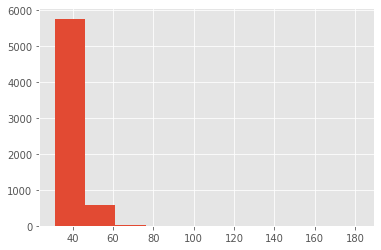

In [116]:
plt.hist([len(x) for x in list(unitig_gwas_sig["variant"])])

In [118]:
max([len(x) for x in list(unitig_gwas_sig["variant"])])

182

In [119]:
np.mean(unitig_gwas_sig["beta"])

-0.010066839215686275

In [120]:
min([len(x) for x in list(unitig_gwas_sig["variant"])])

31